In [2]:
import csv
import matplotlib as plt

# Example: extracting price columns from a DataFrame row
open_price = float(row['Open'])
high_price = float(row['High'])
low_price = float(row['Low'])
close_price = float(row['Close'])

NameError: name 'row' is not defined

In [ ]:
import pandas as pd
import numpy as np

# Example: extracting price columns from a DataFrame row
open_price = float(row['Open'])
high_price = float(row['High'])
low_price = float(row['Low'])
close_price = float(row['Close'])

/var/folders/z7/r_tqdn6d1hg1j1gn1qbc2qn40000gn/T/ipykernel_23963/3804826976.py:5: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/var/folders/z7/r_tqdn6d1hg1j1gn1qbc2qn40000gn/T/ipykernel_23963/3804826976.py:6: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/var/folders/z7/r_tqdn6d1hg1j1gn1qbc2qn40000gn/T/ipykernel_23963/3804826976.py:7: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/var/folders/z7/r_tqdn6d1hg1j1gn1qbc2qn40000gn/T/ipykernel_23963/3804826976.py:8: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



In [ ]:
import ta
import yfinance as yf

# Example: extracting price columns from a DataFrame row
open_price = float(row['Open'])
high_price = float(row['High'])
low_price = float(row['Low'])
close_price = float(row['Close'])

/var/folders/z7/r_tqdn6d1hg1j1gn1qbc2qn40000gn/T/ipykernel_23963/1092731887.py:5: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/var/folders/z7/r_tqdn6d1hg1j1gn1qbc2qn40000gn/T/ipykernel_23963/1092731887.py:6: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/var/folders/z7/r_tqdn6d1hg1j1gn1qbc2qn40000gn/T/ipykernel_23963/1092731887.py:7: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/var/folders/z7/r_tqdn6d1hg1j1gn1qbc2qn40000gn/T/ipykernel_23963/1092731887.py:8: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



In [ ]:
import plotly.graph_objects as go

In [ ]:
# Download stock data for analysis
def get_stock_df(symbol, start_date):
    import yfinance as yf
    return yf.download(symbol, start=start_date)

input_stock = get_stock_df('HPG.VN', start_date='2020-01-01')
input_stock.tail(10)
type(input_stock['Close'])

/var/folders/z7/r_tqdn6d1hg1j1gn1qbc2qn40000gn/T/ipykernel_23963/3226642384.py:4: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed



pandas.core.frame.DataFrame

In [ ]:
# Ensure 'Close' is a 1D Series
close_series = input_stock['Close'].squeeze()

macd_object = ta.trend.MACD(close_series)
input_stock['MACD'] = macd_object.macd()
input_stock['MACD_Signal'] = macd_object.macd_signal()
input_stock['MACD_Diff'] = macd_object.macd_diff()
input_stock.tail()

Price,Close,High,Low,Open,Volume,MACD,MACD_Signal,MACD_Diff
Ticker,HPG.VN,HPG.VN,HPG.VN,HPG.VN,HPG.VN,,,
Date,,,,,,,,
2025-07-23,26400.0,26950.0,26400.0,26550.0,43395210,1057.728259,946.971697,110.756562
2025-07-24,26000.0,26450.0,25900.0,26400.0,52177470,1012.747113,960.126780,52.620333
2025-07-25,26050.0,26300.0,25900.0,26000.0,51279500,969.952801,962.091984,7.860817
2025-07-28,26350.0,26850.0,26000.0,26100.0,101019500,949.302524,959.534092,-10.231568
2025-07-29,25350.0,26600.0,25350.0,26450.0,82685129,842.533191,936.133912,-93.600721


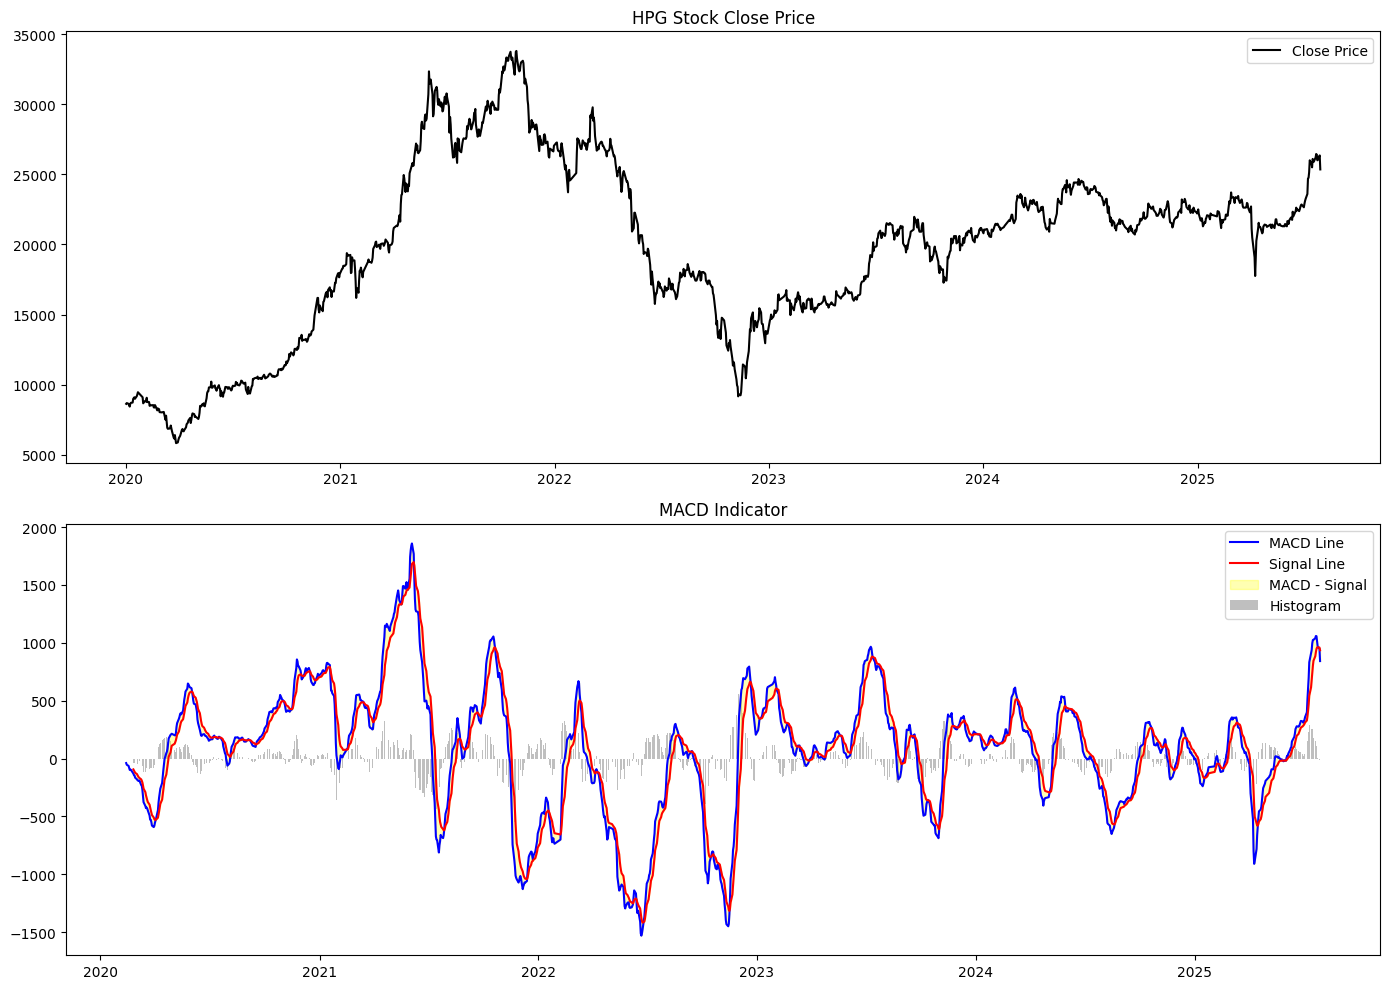

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))

# First graph: Close Price
plt.subplot(2,1,1)
plt.plot(input_stock['Close'], label='Close Price', color='black')
plt.title('HPG Stock Close Price')
plt.legend()

# Second graph: MACD
plt.subplot(2,1,2)
plt.plot(input_stock['MACD'], label='MACD Line', color='blue')
plt.plot(input_stock['MACD_Signal'], label='Signal Line', color='red')
plt.bar(input_stock.index, input_stock['MACD_Diff'], label='Histogram', color='grey', alpha=0.5)
plt.fill_between(input_stock.index, input_stock['MACD'], input_stock['MACD_Signal'], color='yellow', alpha=0.3, label='MACD - Signal')
plt.title('MACD Indicator')
plt.legend()

plt.tight_layout()
plt.show()

Index is unique: True
Bullish_Run_Start dtype: bool shape: (1390,)
Bearish_Run_Start dtype: bool shape: (1390,)


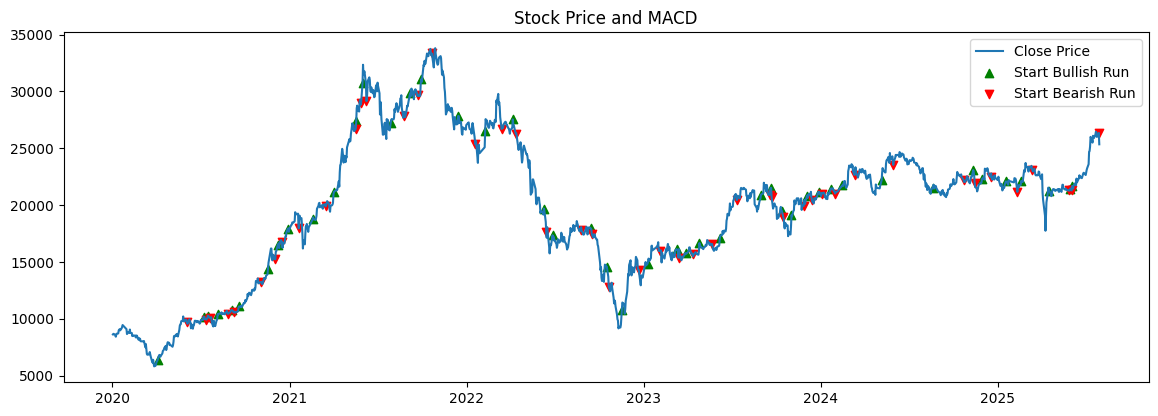

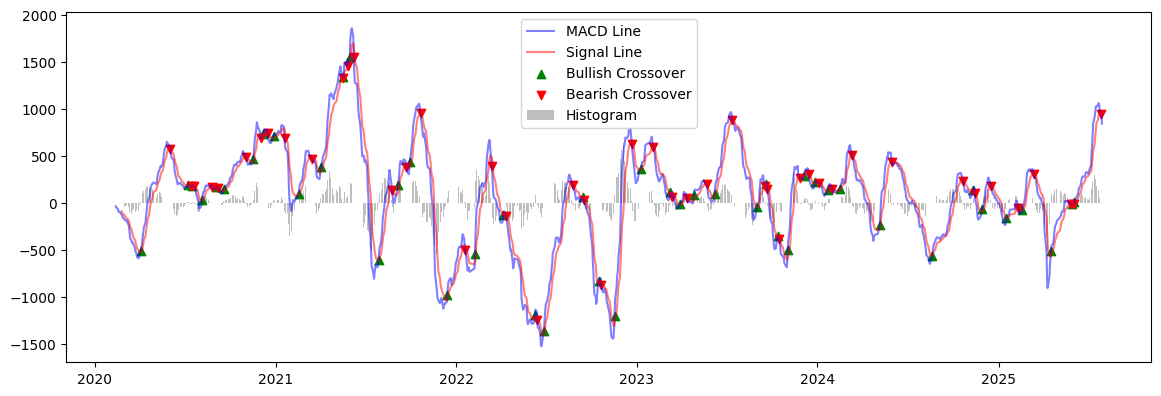

In [ ]:
# Identify starting points of bullish and bearish trends
input_stock['Bullish_Run_Start'] = ((input_stock['MACD'] > input_stock['MACD_Signal']) & (input_stock['MACD'].shift(1) <= input_stock['MACD_Signal'].shift(1))).fillna(False).astype(bool)
input_stock['Bearish_Run_Start'] = ((input_stock['MACD'] < input_stock['MACD_Signal']) & (input_stock['MACD'].shift(1) >= input_stock['MACD_Signal'].shift(1))).fillna(False).astype(bool)

# Debug: Check index uniqueness and mask types
print('Index is unique:', input_stock.index.is_unique)
print('Bullish_Run_Start dtype:', input_stock['Bullish_Run_Start'].dtype, 'shape:', input_stock['Bullish_Run_Start'].shape)
print('Bearish_Run_Start dtype:', input_stock['Bearish_Run_Start'].dtype, 'shape:', input_stock['Bearish_Run_Start'].shape)

# Plot
plt.figure(figsize=(14, 10))

#Plot Close Price
plt.subplot(2, 1, 1)
plt.plot(input_stock['Close'], label='Close Price')
plt.scatter(input_stock.index[input_stock['Bullish_Run_Start']], input_stock['Close'][input_stock['Bullish_Run_Start']], marker='^', color='g', label='Start Bullish Run')
plt.scatter(input_stock.index[input_stock['Bearish_Run_Start']], input_stock['Close'][input_stock['Bearish_Run_Start']], marker='v', color='r', label='Start Bearish Run')
plt.title('Stock Price and MACD')
plt.legend()


# Identify bullish and bearish crossover points
input_stock['Bullish_Crossover'] = ((input_stock['MACD'] > input_stock['MACD_Signal']) & (input_stock['MACD'].shift(1) <= input_stock['MACD_Signal'].shift(1))).fillna(False).astype(bool)
input_stock['Bearish_Crossover'] = ((input_stock['MACD'] < input_stock['MACD_Signal']) & (input_stock['MACD'].shift(1) >= input_stock['MACD_Signal'].shift(1))).fillna(False).astype(bool)

# Plot
plt.figure(figsize=(14, 10))

# Plot MACD
plt.subplot(2, 1, 2)
plt.plot(input_stock['MACD'], label='MACD Line', color='blue', alpha=0.5)
plt.plot(input_stock['MACD_Signal'], label='Signal Line', color='red', alpha=0.5)
plt.bar(input_stock.index, input_stock['MACD_Diff'], label='Histogram', color='grey', alpha=0.5)

# Markers for bullish and bearish crossover
plt.scatter(input_stock.index[input_stock['Bullish_Crossover']], input_stock['MACD'][input_stock['Bullish_Crossover']], marker='^', color='g', label='Bullish Crossover')
plt.scatter(input_stock.index[input_stock['Bearish_Crossover']], input_stock['MACD'][input_stock['Bearish_Crossover']], marker='v', color='r', label='Bearish Crossover')

plt.legend()
plt.show()


In [ ]:
bullish_dates = input_stock.index[input_stock['Bullish_Run_Start']].tolist()
bearish_dates = input_stock.index[input_stock['Bearish_Run_Start']].tolist()


print("Bullish run start dates:", bullish_dates)
print("Bearish run start dates:", bearish_dates)

Bullish run start dates: [Timestamp('2020-04-03 00:00:00'), Timestamp('2020-07-07 00:00:00'), Timestamp('2020-07-16 00:00:00'), Timestamp('2020-08-05 00:00:00'), Timestamp('2020-09-03 00:00:00'), Timestamp('2020-09-18 00:00:00'), Timestamp('2020-11-17 00:00:00'), Timestamp('2020-12-07 00:00:00'), Timestamp('2020-12-28 00:00:00'), Timestamp('2021-02-17 00:00:00'), Timestamp('2021-04-02 00:00:00'), Timestamp('2021-05-18 00:00:00'), Timestamp('2021-05-31 00:00:00'), Timestamp('2021-07-28 00:00:00'), Timestamp('2021-09-06 00:00:00'), Timestamp('2021-09-29 00:00:00'), Timestamp('2021-12-14 00:00:00'), Timestamp('2022-02-08 00:00:00'), Timestamp('2022-04-06 00:00:00'), Timestamp('2022-06-09 00:00:00'), Timestamp('2022-06-27 00:00:00'), Timestamp('2022-09-14 00:00:00'), Timestamp('2022-10-17 00:00:00'), Timestamp('2022-11-17 00:00:00'), Timestamp('2023-01-09 00:00:00'), Timestamp('2023-03-10 00:00:00'), Timestamp('2023-03-30 00:00:00'), Timestamp('2023-04-26 00:00:00'), Timestamp('2023-06-07 

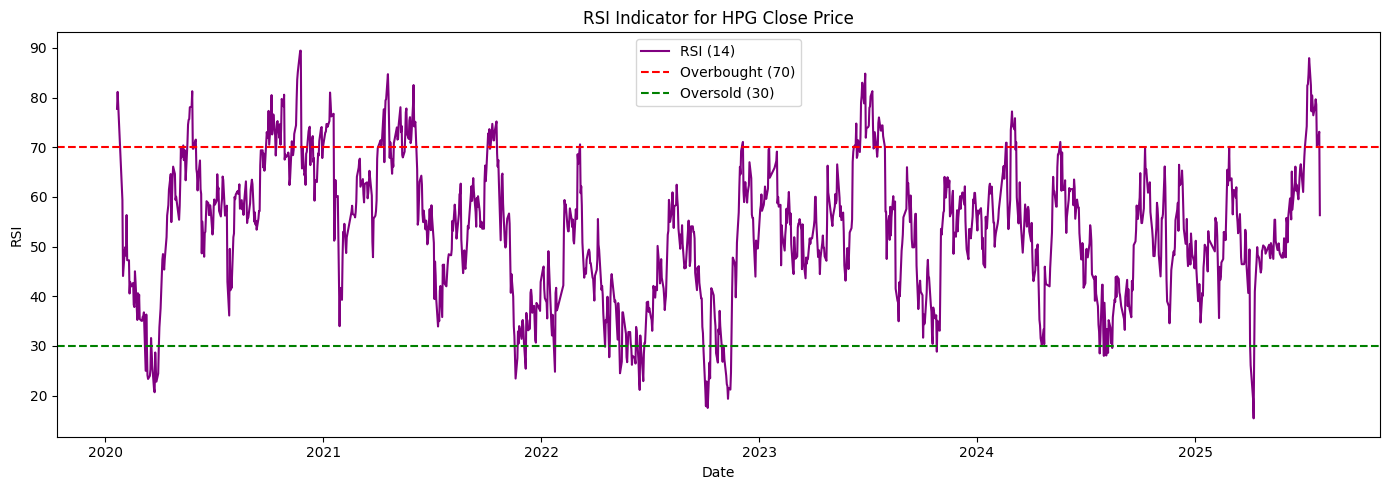

In [ ]:
# First ensure you have the TA library installed
# !pip install ta  # Uncomment if needed

# Import required libraries
import pandas as pd
from ta.momentum import RSIIndicator  # Correct import path

# Assuming hpg is your DataFrame with 'Close' prices
close_array = input_stock['Close'].values  # Better to use .values than .to_numpy()

# Calculate RSI
# Best approach - use the Series directly

# Convert to Series if needed (usually hpg['Close'] is already a Series)
close_series = input_stock['Close'].squeeze() if isinstance(input_stock['Close'], pd.DataFrame) else input_stock['Close']
# Calculate RSI
input_stock['RSI'] = RSIIndicator(close=close_series, window=14).rsi()


# Visualize RSI
plt.figure(figsize=(14,5))
plt.plot(input_stock.index, input_stock['RSI'], label='RSI (14)', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('RSI Indicator for HPG Close Price')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
def get_rsi_for_dates(dates, rsi_series):
    """Return a dictionary mapping date string to RSI value for the given dates."""
    return {str(date): rsi_series.loc[date] for date in dates}

bullish_rsi = get_rsi_for_dates(bullish_dates, input_stock['RSI'])
bearish_rsi = get_rsi_for_dates(bearish_dates, input_stock['RSI'])

print("RSI for bullish run start dates:", bullish_rsi)
print("RSI for bearish run start dates:", bearish_rsi)

RSI for bullish run start dates: {'2020-04-03 00:00:00': np.float64(37.570484016377534), '2020-07-07 00:00:00': np.float64(64.5510183720479), '2020-07-16 00:00:00': np.float64(64.09517012350416), '2020-08-05 00:00:00': np.float64(59.98324281142113), '2020-09-03 00:00:00': np.float64(63.46120607621197), '2020-09-18 00:00:00': np.float64(69.37812936614448), '2020-11-17 00:00:00': np.float64(79.57344974551025), '2020-12-07 00:00:00': np.float64(73.20600347287109), '2020-12-28 00:00:00': np.float64(73.90188458586866), '2021-02-17 00:00:00': np.float64(57.03885562530441), '2021-04-02 00:00:00': np.float64(69.85529567377219), '2021-05-18 00:00:00': np.float64(72.3638333880347), '2021-05-31 00:00:00': np.float64(78.29610157056982), '2021-07-28 00:00:00': np.float64(46.146325538759605), '2021-09-06 00:00:00': np.float64(62.12832202232559), '2021-09-29 00:00:00': np.float64(66.30812585795215), '2021-12-14 00:00:00': np.float64(40.70869807401551), '2022-02-08 00:00:00': np.float64(53.42267556459

In [ ]:
# Remove entries where RSI > 70 from bullish_rsi
for key, value in list(bullish_rsi.items()):
    if value > 70:
        del bullish_rsi[key]

print(bullish_rsi)
print("Size of bullish_rsi:", len(bullish_rsi))

{'2020-04-03 00:00:00': np.float64(37.570484016377534), '2020-07-07 00:00:00': np.float64(64.5510183720479), '2020-07-16 00:00:00': np.float64(64.09517012350416), '2020-08-05 00:00:00': np.float64(59.98324281142113), '2020-09-03 00:00:00': np.float64(63.46120607621197), '2020-09-18 00:00:00': np.float64(69.37812936614448), '2021-02-17 00:00:00': np.float64(57.03885562530441), '2021-04-02 00:00:00': np.float64(69.85529567377219), '2021-07-28 00:00:00': np.float64(46.146325538759605), '2021-09-06 00:00:00': np.float64(62.12832202232559), '2021-09-29 00:00:00': np.float64(66.30812585795215), '2021-12-14 00:00:00': np.float64(40.70869807401551), '2022-02-08 00:00:00': np.float64(53.42267556459977), '2022-04-06 00:00:00': np.float64(55.54892191760759), '2022-06-09 00:00:00': np.float64(33.82312896830484), '2022-06-27 00:00:00': np.float64(38.80859228878863), '2022-09-14 00:00:00': np.float64(52.922414997058), '2022-10-17 00:00:00': np.float64(40.20312380391584), '2022-11-17 00:00:00': np.fl

In [ ]:
for key, value in list(bearish_rsi.items()):
    if value < 30:
        del bearish_rsi[key]

print(bearish_rsi)
print(len(bearish_rsi))

{'2020-06-02 00:00:00': np.float64(65.6328447687976), '2020-07-13 00:00:00': np.float64(56.06117959997968), '2020-07-20 00:00:00': np.float64(56.234847500449256), '2020-08-26 00:00:00': np.float64(54.74430358064307), '2020-09-07 00:00:00': np.float64(55.012179829647174), '2020-11-03 00:00:00': np.float64(68.93319731071263), '2020-12-02 00:00:00': np.float64(62.418724709262214), '2020-12-16 00:00:00': np.float64(67.79674060467477), '2021-01-19 00:00:00': np.float64(51.18566784117664), '2021-03-16 00:00:00': np.float64(59.71538635369231), '2021-05-17 00:00:00': np.float64(69.11344240320008), '2021-05-28 00:00:00': np.float64(71.45495956275771), '2021-06-08 00:00:00': np.float64(54.4003685014062), '2021-08-24 00:00:00': np.float64(45.935444532656405), '2021-09-22 00:00:00': np.float64(54.44557998341298), '2021-10-21 00:00:00': np.float64(67.4291896377884), '2022-01-19 00:00:00': np.float64(32.10492955476428), '2022-03-14 00:00:00': np.float64(43.736003469365194), '2022-04-12 00:00:00': np

In [ ]:
# Convert bullish_rsi keys to sorted datetime list
bullish_rsi_dates = sorted(bullish_rsi.keys(), key=lambda x: pd.to_datetime(x))

valid_bullish_dates = []
bullish_patterns = []  # Store pattern type for each valid date

for i, date_str in enumerate(bullish_rsi_dates):
    # Get current row safely (handle duplicates)
    date = pd.to_datetime(date_str)
    row = input_stock.loc[date]
    
    # If multiple rows, take first and convert to scalar values
    if isinstance(row, pd.DataFrame):
        row = row.iloc[0]
    
    # Extract scalar values explicitly and unambiguously
    open_price = float(row['Open'])
    high_price = float(row['High'])
    low_price = float(row['Low'])
    close_price = float(row['Close'])
    
    # Calculate metrics
    body = abs(open_price - close_price)
    candle_range = high_price - low_price
    shadow = candle_range - body
    avg_value = (open_price + close_price) / 2;
    
    # Get previous candle if exists
    prev_avg = None
    engulfing = False
    pattern_type = None
    if i > 0:
        prev_date_str = bullish_rsi_dates[i-1]
        prev_date = pd.to_datetime(prev_date_str)
        prev_row = input_stock.loc[prev_date]
        
        if isinstance(prev_row, pd.DataFrame):
            prev_row = prev_row.iloc[0]
        
        # Extract scalar values for previous candle
        prev_open = float(prev_row['Open'])
        prev_close = float(prev_row['Close'])
        prev_avg = (prev_open + prev_close) / 2
        engulfing = (open_price < prev_close) and (close_price > prev_open)
    
    # Check conditions with SCALAR values
    has_long_shadow = (shadow > 1.5 * body)
    is_avg_higher = (prev_avg is not None) and (avg_value > prev_avg)
    
    # First candle only needs shadow condition
    if i == 0:
        if has_long_shadow:
            valid_bullish_dates.append(date_str)
            pattern_type = "classic"
    # Subsequent candles need both conditions
    else:
        if has_long_shadow and is_avg_higher:
            valid_bullish_dates.append(date_str)
            pattern_type = "classic"
        elif engulfing:
            valid_bullish_dates.append(date_str)
            pattern_type = "engulfing"
    
    if pattern_type:
        bullish_patterns.append(pattern_type)

print("valid bullish dates:", valid_bullish_dates)
print("pattern types:", bullish_patterns)
print(len(valid_bullish_dates))

valid bullish dates: ['2020-07-16 00:00:00', '2020-08-05 00:00:00', '2020-09-03 00:00:00', '2021-04-02 00:00:00', '2023-01-09 00:00:00', '2023-03-10 00:00:00', '2023-08-31 00:00:00', '2023-12-28 00:00:00', '2024-01-22 00:00:00', '2025-01-17 00:00:00', '2025-02-18 00:00:00', '2025-05-30 00:00:00']
pattern types: ['engulfing', 'engulfing', 'classic', 'classic', 'classic', 'classic', 'classic', 'classic', 'classic', 'engulfing', 'engulfing', 'classic']
12


/var/folders/z7/r_tqdn6d1hg1j1gn1qbc2qn40000gn/T/ipykernel_23963/1706246359.py:17: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/var/folders/z7/r_tqdn6d1hg1j1gn1qbc2qn40000gn/T/ipykernel_23963/1706246359.py:18: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/var/folders/z7/r_tqdn6d1hg1j1gn1qbc2qn40000gn/T/ipykernel_23963/1706246359.py:19: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/var/folders/z7/r_tqdn6d1hg1j1gn1qbc2qn40000gn/T/ipykernel_23963/1706246359.py:20: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/var/folders/z7/r_tqdn6d1hg1j1gn1qbc2qn40000gn/T/ipykernel_23963/1706246359.py:41: Futur

In [ ]:
# Convert bearish_rsi keys to sorted datetime list
bullish_rsi_dates = sorted(bullish_rsi.keys(), key=lambda x: pd.to_datetime(x))

invalid_bullish_dates = []

for i, date_str in enumerate(bullish_rsi_dates):
    try:
        # Get current row safely (handle duplicates)
        date = pd.to_datetime(date_str)
        row = input_stock.loc[date]
        
        # If multiple rows, take first and convert to scalar values
        if isinstance(row, pd.DataFrame):
            row = row.iloc[0]
        
        # Extract scalar values explicitly
        open_price = row['Open'].item() if hasattr(row['Open'], 'item') else row['Open']
        high_price = row['High'].item() if hasattr(row['High'], 'item') else row['High']
        low_price = row['Low'].item() if hasattr(row['Low'], 'item') else row['Low']
        close_price = row['Close'].item() if hasattr(row['Close'], 'item') else row['Close']
        
        # Calculate metrics
        body = abs(open_price - close_price)
        candle_range = high_price - low_price
        shadow = candle_range - body
        avg_value = (open_price + close_price) / 2
        
        # Get previous candle if exists
        prev_avg = None
        if i > 0:
            prev_date_str = bullish_rsi_dates[i-1]
            prev_date = pd.to_datetime(prev_date_str)
            prev_row = input_stock.loc[prev_date]
            
            if isinstance(prev_row, pd.DataFrame):
                prev_row = prev_row.iloc[0]
            
            # Extract scalar values for previous candle
            prev_open = prev_row['Open'].item() if hasattr(prev_row['Open'], 'item') else prev_row['Open']
            prev_close = prev_row['Close'].item() if hasattr(prev_row['Close'], 'item') else prev_row['Close']
            prev_avg = (prev_open + prev_close) / 2
            prev_half = (prev_open + prev_close) / 2
            new_bearish_pattern = (high_price <= prev_close) and (avg_value < (prev_half / 2))
        # Bearish: long shadow and avg_value < prev_avg (downtrend)
        has_long_shadow = shadow > 2 * body
        is_avg_lower = (prev_avg is not None) and (avg_value < prev_avg)
        engulfing = (open_price > prev_close) and (close_price < prev_open)
        if i == 0:
            if has_long_shadow:
                valid_bearish_dates.append(date_str)
        else:
            if (has_long_shadow and is_avg_lower) or engulfing:
                valid_bearish_dates.append(date_str)
    except KeyError:
        invalid_bullish_dates.append(date_str)

print(len(invalid_bullish_dates))

38


In [ ]:
# Convert bearish_rsi keys to sorted datetime list
bearish_rsi_dates = sorted(bearish_rsi.keys(), key=lambda x: pd.to_datetime(x))

valid_bearish_dates = []

for i, date_str in enumerate(bearish_rsi_dates):
    try:
        date = pd.to_datetime(date_str)
        row = input_stock.loc[date]
        if isinstance(row, pd.DataFrame):
            row = row.iloc[0]
        open_price = row['Open'].item() if hasattr(row['Open'], 'item') else row['Open']
        high_price = row['High'].item() if hasattr(row['High'], 'item') else row['High']
        low_price = row['Low'].item() if hasattr(row['Low'], 'item') else row['Low']
        close_price = row['Close'].item() if hasattr(row['Close'], 'item') else row['Close']
        body = abs(open_price - close_price)
        candle_range = high_price - low_price
        shadow = candle_range - body
        avg_value = (open_price + close_price) / 2
        prev_avg = None
        if i > 0:
            prev_date_str = bearish_rsi_dates[i-1]
            prev_date = pd.to_datetime(prev_date_str)
            prev_row = input_stock.loc[prev_date]
            if isinstance(prev_row, pd.DataFrame):
                prev_row = prev_row.iloc[0]
            prev_open = prev_row['Open'].item() if hasattr(prev_row['Open'], 'item') else prev_row['Open']
            prev_close = prev_row['Close'].item() if hasattr(prev_row['Close'], 'item') else prev_row['Close']
            prev_avg = (prev_open + prev_close) / 2
            prev_half = (prev_open + prev_close) / 2
            new_bearish_pattern = (high_price <= prev_close) and (avg_value < (prev_half / 2))
        # Bearish: long shadow and avg_value < prev_avg (downtrend)
        has_long_shadow = shadow > 1.5 * body
        is_avg_lower = (prev_avg is not None) and (avg_value < prev_avg)
        engulfing = (open_price > prev_close) and (close_price < prev_open)
        if i == 0:
            if has_long_shadow:
                valid_bearish_dates.append(date_str)
        else:
            if (has_long_shadow and is_avg_lower) or engulfing:
                valid_bearish_dates.append(date_str)
    except KeyError:
        continue

print("Valid bearish dates:", valid_bearish_dates)
print(len(valid_bearish_dates))


Valid bearish dates: ['2020-07-13 00:00:00', '2021-08-24 00:00:00', '2022-04-12 00:00:00', '2022-12-22 00:00:00', '2023-04-12 00:00:00', '2023-09-22 00:00:00', '2024-01-31 00:00:00', '2024-10-22 00:00:00', '2024-11-14 00:00:00', '2024-12-17 00:00:00', '2025-06-02 00:00:00']
11


In [ ]:
# Pair each bullish date with the next bearish date after it (and before the next bullish date),
# but take profit at 10% above buy price if reached before any bearish pattern.
from datetime import datetime

# Ensure valid_bullish_dates and valid_bearish_dates are sorted
bullish_dates_sorted = sorted(valid_bullish_dates, key=lambda x: pd.to_datetime(x))
bearish_dates_sorted = sorted(valid_bearish_dates, key=lambda x: pd.to_datetime(x))

bull_bear_pairs = []

for i, bull_date_str in enumerate(bullish_dates_sorted):
    bull_date = pd.to_datetime(bull_date_str)
    # Find the next bullish date (or set to a far future date if last)
    if i + 1 < len(bullish_dates_sorted):
        next_bull_date = pd.to_datetime(bullish_dates_sorted[i+1])
    else:
        next_bull_date = pd.Timestamp.max
    # Find all bearish dates after this bullish date and before the next bullish date
    candidate_bears = [b for b in bearish_dates_sorted if bull_date < pd.to_datetime(b) < next_bull_date]
    # Get buy open price
    buy_row = input_stock.loc[bull_date]
    if isinstance(buy_row, pd.DataFrame):
        buy_row = buy_row.iloc[0]
    buy_open = buy_row['Open'].item() if hasattr(buy_row['Open'], 'item') else buy_row['Open']
    take_profit_price = 1.2 * buy_open
    # Find the first date after buy_date where close >= take_profit_price (take profit priority)
    after_buy = input_stock.loc[bull_date:]
    take_profit_date = None
    for idx, row in after_buy.iterrows():
        close_val = row['Close'].item() if hasattr(row['Close'], 'item') else row['Close']
        if close_val >= take_profit_price:
            take_profit_date = idx
            break
    # Find the first bearish date after buy (if any)
    first_bear_date = None
    for bear_str in candidate_bears:
        bear_date = pd.to_datetime(bear_str)
        if bear_date > bull_date:
            first_bear_date = bear_date
            break
    # Decide which comes first: take profit or bearish
    if take_profit_date is not None and (first_bear_date is None or pd.to_datetime(take_profit_date) <= first_bear_date):
        # Take profit comes first or no bearish before next buy
        bull_bear_pairs.append((bull_date_str, take_profit_date.strftime('%Y-%m-%d'), 'take_profit'))
    elif first_bear_date is not None:
        # Bearish comes first
        bull_bear_pairs.append((bull_date_str, first_bear_date.strftime('%Y-%m-%d'), 'bearish'))
    # else: no exit found, skip

print("Bullish-Bearish/TakeProfit pairs:", bull_bear_pairs)
print("Number of pairs:", len(bull_bear_pairs))


Bullish-Bearish/TakeProfit pairs: [('2020-07-16 00:00:00', '2020-10-06', 'take_profit'), ('2020-08-05 00:00:00', '2020-10-06', 'take_profit'), ('2020-09-03 00:00:00', '2020-10-23', 'take_profit'), ('2021-04-02 00:00:00', '2021-05-04', 'take_profit'), ('2023-01-09 00:00:00', '2023-06-21', 'take_profit'), ('2023-03-10 00:00:00', '2023-04-12', 'bearish'), ('2023-08-31 00:00:00', '2023-09-22', 'bearish'), ('2023-12-28 00:00:00', '2025-07-11', 'take_profit'), ('2024-01-22 00:00:00', '2024-01-31', 'bearish'), ('2025-01-17 00:00:00', '2025-07-22', 'take_profit'), ('2025-02-18 00:00:00', '2025-07-22', 'take_profit'), ('2025-05-30 00:00:00', '2025-06-02', 'bearish')]
Number of pairs: 12


In [ ]:
# Construct a table to show the return of each bullish-bearish/take-profit pair, including pattern type and exit reason
import pandas as pd

pair_data = []
for idx, (bull_date_str, exit_date_str, exit_type) in enumerate(bull_bear_pairs):
    bull_date = pd.to_datetime(bull_date_str)
    exit_date = pd.to_datetime(exit_date_str)
    bull_row = input_stock.loc[bull_date]
    exit_row = input_stock.loc[exit_date]
    if isinstance(bull_row, pd.DataFrame):
        bull_row = bull_row.iloc[0]
    if isinstance(exit_row, pd.DataFrame):
        exit_row = exit_row.iloc[0]
    bull_open = bull_row['Open'].item() if hasattr(bull_row['Open'], 'item') else bull_row['Open']
    exit_close = exit_row['Close'].item() if hasattr(exit_row['Close'], 'item') else exit_row['Close']
    ret = exit_close - bull_open  # Absolute difference, not percent
    # Find pattern type for this bullish date
    pattern_type = None
    if bull_date_str in valid_bullish_dates:
        pattern_idx = valid_bullish_dates.index(bull_date_str)
        pattern_type = bullish_patterns[pattern_idx]
    pair_data.append({
        'Bullish Date': bull_date.strftime('%Y-%m-%d'),
        'Exit Date': exit_date.strftime('%Y-%m-%d'),
        'Bullish Open': bull_open,
        'Exit Close': exit_close,
        'Return': ret,
        'Pattern Type': pattern_type,
        'Exit Type': exit_type
    })

pair_df = pd.DataFrame(pair_data)
display(pair_df)


,Bullish Date,Exit Date,Bullish Open,Exit Close,Return,Pattern Type,Exit Type
0,2020-07-16,2020-10-06,10144.176758,12194.595703,2050.418945,engulfing,take_profit
1,2020-08-05,2020-10-06,9928.342773,12194.595703,2266.252930,engulfing,take_profit
2,2020-09-03,2020-10-23,10791.677734,13338.513672,2546.835938,classic,take_profit
3,2021-04-02,2021-05-04,21065.353516,25813.693359,4748.339844,classic,take_profit
4,2023-01-09,2023-06-21,15000.000000,18636.363281,3636.363281,classic,take_profit
5,2023-03-10,2023-04-12,16022.727539,15719.697266,-303.030273,classic,bearish
6,2023-08-31,2023-09-22,20757.576172,20681.818359,-75.757812,classic,bearish
7,2023-12-28,2025-07-11,21022.726562,26000.000000,4977.273438,classic,take_profit
8,2024-01-22,2024-01-31,21212.121094,21022.726562,-189.394531,classic,bearish
9,2025-01-17,2025-07-22,21916.666016,26450.000000,4533.333984,engulfing,take_profit


In [ ]:
def analyze_stock(stock_name, start_date):
    import yfinance as yf
    import pandas as pd
    import matplotlib.pyplot as plt
    import ta
    from ta.momentum import RSIIndicator
    import mplfinance as mpf

    # Download daily data (default interval)
    df = yf.download(stock_name, start=start_date)
    if df.empty:
        print(f"No data found for {stock_name}")
        return

    # Ensure price columns are 1D float Series
    for col in ['Open', 'High', 'Low', 'Close']:
        if col in df.columns:
            if isinstance(df[col], pd.DataFrame):
                col_data = df[col].iloc[:, 0]
            else:
                col_data = df[col]
            df[col] = pd.to_numeric(col_data, errors='coerce')

    # MACD
    close_series = df['Close'].squeeze()
    macd_object = ta.trend.MACD(close_series)
    
    # Ensure MACD is a 1D array/Series
    macd_series = macd_object.macd()
    if isinstance(macd_series, pd.DataFrame):
        macd_series = macd_series.squeeze()
    df['MACD'] = macd_series
    
    df['MACD_Signal'] = macd_object.macd_signal()
    df['MACD_Diff'] = macd_object.macd_diff()

    # MACD chart (Daily)
    plt.figure(figsize=(14, 10))
    plt.subplot(2, 1, 1)
    plt.plot(df['Close'], label='Close Price', color='black')
    plt.title(f'{stock_name} Daily Close Price')
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.plot(df['MACD'], label='MACD Line', color='blue')
    plt.plot(df['MACD_Signal'], label='Signal Line', color='red')
    plt.bar(df.index, df['MACD_Diff'], label='Histogram', color='grey', alpha=0.5)
    plt.fill_between(df.index, df['MACD'], df['MACD_Signal'], color='yellow', alpha=0.3, label='MACD - Signal')
    plt.title('MACD Indicator (Daily)')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Identify starting points of bullish and bearish trends
    df['Bullish_Run_Start'] = ((df['MACD'] > df['MACD_Signal']) & (df['MACD'].shift(1) <= df['MACD_Signal'].shift(1))).fillna(False).astype(bool)
    df['Bearish_Run_Start'] = ((df['MACD'] < df['MACD_Signal']) & (df['MACD'].shift(1) >= df['MACD_Signal'].shift(1))).fillna(False).astype(bool)
    df['RSI'] = RSIIndicator(close=close_series, window=14).rsi()

    plt.figure(figsize=(14, 5))
    plt.plot(df.index, df['RSI'], label='RSI (14)', color='purple')
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
    plt.title(f'RSI Indicator for {stock_name} Daily Close Price')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Get RSI for dates
    def get_rsi_for_dates(dates, rsi_series):
        return {str(date): rsi_series.loc[date] for date in dates}

    bullish_dates = df.index[df['Bullish_Run_Start']].tolist()
    bearish_dates = df.index[df['Bearish_Run_Start']].tolist()
    bullish_rsi = get_rsi_for_dates(bullish_dates, df['RSI'])
    bearish_rsi = get_rsi_for_dates(bearish_dates, df['RSI'])

    # Remove entries where RSI > 70 from bullish_rsi (classic daily threshold)
    for key, value in list(bullish_rsi.items()):
        if value > 70:
            del bullish_rsi[key]
    for key, value in list(bearish_rsi.items()):
        if value < 30:
            del bearish_rsi[key]

    # Bullish candlestick filter (long shadow + uptrend or engulfing)
    bullish_rsi_dates = sorted(bullish_rsi.keys(), key=lambda x: pd.to_datetime(x))
    valid_bullish_dates = []
    bullish_patterns = []
    for i, date_str in enumerate(bullish_rsi_dates):
        date = pd.to_datetime(date_str)
        row = df.loc[date].squeeze()
        if isinstance(row, pd.DataFrame):
            row = row.iloc[0]
        # Explicit float conversion for unambiguous extraction
        open_price = float(row['Open'])
        high_price = float(row['High'])
        low_price = float(row['Low'])
        close_price = float(row['Close'])
        body = abs(open_price - close_price)
        candle_range = high_price - low_price
        shadow = candle_range - body
        avg_value = (open_price + close_price) / 2
        prev_avg = None
        engulfing = False
        pattern_type = None
        if i > 0:
            prev_date_str = bullish_rsi_dates[i-1]
            prev_date = pd.to_datetime(prev_date_str)
            prev_row = df.loc[prev_date]
            if isinstance(prev_row, pd.DataFrame):
                prev_row = prev_row.iloc[0]
            prev_open = float(prev_row['Open'])
            prev_close = float(prev_row['Close'])
            prev_avg = (prev_open + prev_close) / 2
            engulfing = (open_price < prev_close) and (close_price > prev_open)
        has_long_shadow = shadow > 1.5 * body
        is_avg_higher = (prev_avg is not None) and (avg_value > prev_avg)
        if i == 0:
            if has_long_shadow:
                valid_bullish_dates.append(date_str)
                pattern_type = "classic"
        else:
            if has_long_shadow and is_avg_higher:
                valid_bullish_dates.append(date_str)
                pattern_type = "classic"
            elif engulfing:
                valid_bullish_dates.append(date_str)
                pattern_type = "engulfing"
        if pattern_type:
            bullish_patterns.append(pattern_type)

    # Bearish candlestick filter (long shadow + downtrend or engulfing)
    bearish_rsi_dates = sorted(bearish_rsi.keys(), key=lambda x: pd.to_datetime(x))
    valid_bearish_dates = []
    for i, date_str in enumerate(bearish_rsi_dates):
        date = pd.to_datetime(date_str)
        row = df.loc[date]
        if isinstance(row, pd.DataFrame):
            row = row.iloc[0]
        open_price = float(row['Open'])
        high_price = float(row['High'])
        low_price = float(row['Low'])
        close_price = float(row['Close'])
        body = abs(open_price - close_price)
        candle_range = high_price - low_price
        shadow = candle_range - body
        avg_value = (open_price + close_price) / 2
        prev_avg = None
        engulfing = False
        if i > 0:
            prev_date_str = bearish_rsi_dates[i-1]
            prev_date = pd.to_datetime(prev_date_str)
            prev_row = df.loc[prev_date]
            if isinstance(prev_row, pd.DataFrame):
                prev_row = prev_row.iloc[0]
            prev_open = float(prev_row['Open'])
            prev_close = float(prev_row['Close'])
            prev_avg = (prev_open + prev_close) / 2
            engulfing = (open_price > prev_close) and (close_price < prev_open)
        has_long_shadow = shadow > 2 * body
        is_avg_lower = (prev_avg is not None) and (avg_value < prev_avg)
        if i == 0:
            if has_long_shadow:
                valid_bearish_dates.append(date_str)
        else:
            if (has_long_shadow and is_avg_lower) or engulfing:
                valid_bearish_dates.append(date_str)
    
    # Pair each bullish date with the next bearish date after it (and before the next bullish date),
    # but take profit at 20% above buy price if reached before any bearish pattern.
    from datetime import datetime
    bullish_dates_sorted = sorted(valid_bullish_dates, key=lambda x: pd.to_datetime(x))
    bearish_dates_sorted = sorted(valid_bearish_dates, key=lambda x: pd.to_datetime(x))
    bull_bear_pairs = []
    for i, bull_date_str in enumerate(bullish_dates_sorted):
        bull_date = pd.to_datetime(bull_date_str)
        # Find the next bullish date (or set to a far future date if last)
        if i + 1 < len(bullish_dates_sorted):
            next_bull_date = pd.to_datetime(bullish_dates_sorted[i+1])
        else:
            next_bull_date = pd.Timestamp.max
        # Find all bearish dates after this bullish date and before the next bullish date
        candidate_bears = [b for b in bearish_dates_sorted if bull_date < pd.to_datetime(b) < next_bull_date]
        # Get buy open price
        buy_row = df.loc[bull_date]
        if isinstance(buy_row, pd.DataFrame):
            buy_row = buy_row.iloc[0]
        buy_open = float(buy_row['Open'])
        take_profit_price = 1.15 * buy_open
        # Find the first date after buy_date where close >= take_profit_price (take profit priority)
        after_buy = df.loc[bull_date:]
        take_profit_date = None
        for idx, row in after_buy.iterrows():
            close_val = float(row['Close'])
            if close_val >= take_profit_price:
                take_profit_date = idx
                break
        # Find the first bearish date after buy (if any)
        first_bear_date = None
        for bear_str in candidate_bears:
            bear_date = pd.to_datetime(bear_str)
            if bear_date > bull_date:
                first_bear_date = bear_date
                break
        # Decide which comes first: take profit or bearish
        if take_profit_date is not None and (first_bear_date is None or pd.to_datetime(take_profit_date) <= first_bear_date):
            # Take profit comes first or no bearish before next buy
            bull_bear_pairs.append((bull_date_str, take_profit_date.strftime('%Y-%m-%d'), 'take_profit'))
        elif first_bear_date is not None:
            # Bearish comes first
            bull_bear_pairs.append((bull_date_str, first_bear_date.strftime('%Y-%m-%d'), 'bearish'))
        # else: no exit found, skip

    # Remove pairs with duration less than 5 days
    filtered_bull_bear_pairs = []
    for bull_date_str, exit_date_str, exit_type in bull_bear_pairs:
        bull_date = pd.to_datetime(bull_date_str)
        exit_date = pd.to_datetime(exit_date_str)
        if (exit_date - bull_date).days >= 7:
            filtered_bull_bear_pairs.append((bull_date_str, exit_date_str, exit_type))

    # Use only filtered_bull_bear_pairs for the result table and display
    pair_data = []
    for idx, (bull_date_str, exit_date_str, exit_type) in enumerate(filtered_bull_bear_pairs):
        bull_date = pd.to_datetime(bull_date_str)
        exit_date = pd.to_datetime(exit_date_str)
        bull_row = df.loc[bull_date]
        exit_row = df.loc[exit_date]
        if isinstance(bull_row, pd.DataFrame):
            bull_row = bull_row.iloc[0]
        if isinstance(exit_row, pd.DataFrame):
            exit_row = exit_row.iloc[0]
        bull_open = float(bull_row['Open'])
        exit_close = float(exit_row['Close'])
        ret = exit_close - bull_open  # Absolute difference, not percent
        # Find pattern type for this bullish date
        pattern_type = None
        if bull_date_str in valid_bullish_dates:
            pattern_idx = valid_bullish_dates.index(bull_date_str)
            pattern_type = bullish_patterns[pattern_idx]
        pair_data.append({
            'Bullish Date': bull_date.strftime('%Y-%m-%d'),
            'Exit Date': exit_date.strftime('%Y-%m-%d'),
            'Bullish Open': bull_open,
            'Exit Close': exit_close,
            'Return': ret,
            'Pattern Type': pattern_type,
            'Exit Type': exit_type
        })

    pair_df = pd.DataFrame(pair_data)
    display(pair_df)

    # --- Candlestick chart (optional, not required by user) ---
    # mpf.plot(df, type='candle', style='charles',
    #          title=f'{stock_name} Price Chart',
    #          ylabel='Price',
    #          volume=True, ylabel_lower='Volume',
    #          addplot=[
    #              mpf.make_addplot(df['MACD'], panel=1, color='blue', title='MACD'),
    #              mpf.make_addplot(df['MACD_Signal'], panel=1, color='red'),
    #              mpf.make_addplot(df['RSI'], panel=2, color='purple', title='RSI'),
    #          ],
    #          figratio=(14,10), figscale=1.2)
    # plt.show()

    # --- Stock price with buy/exit markers ---
    if len(filtered_bull_bear_pairs) > 0:
        buy_dates = [pd.to_datetime(buy) for buy, _, _ in filtered_bull_bear_pairs]
        exit_dates = [pd.to_datetime(exit_) for _, exit_, _ in filtered_bull_bear_pairs]
        buy_prices = [df.loc[date]['Open'] if not isinstance(df.loc[date], pd.DataFrame) else df.loc[date].iloc[0]['Open'] for date in buy_dates]
        exit_prices = [df.loc[date]['Close'] if not isinstance(df.loc[date], pd.DataFrame) else df.loc[date].iloc[0]['Close'] for date in exit_dates]
        plt.figure(figsize=(16, 8))
        plt.plot(df['Close'], label='Close Price', color='black')
        plt.scatter(buy_dates, buy_prices, marker='^', color='green', s=120, label='Buy', zorder=5)
        plt.scatter(exit_dates, exit_prices, marker='v', color='red', s=120, label='Exit', zorder=5)
        for i in range(len(buy_dates)):
            plt.plot([buy_dates[i], exit_dates[i]], [buy_prices[i], exit_prices[i]], color='gray', linestyle='--', alpha=0.5)
        plt.title(f'{stock_name} Price: Buy and Exit Points')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.tight_layout()
        plt.show()



In [15]:
import yfinance as yf
import pandas as pd
import ta
from datetime import datetime

def find_latest_macd_cross_and_rise(stocks, days_to_confirm_rise=3):
    """
    Finds the latest bullish MACD crossover for each stock and confirms
    if the price increased in the subsequent days.

    Args:
        stocks (list): A list of stock tickers to scan.
        days_to_confirm_rise (int): The number of trading days after the cross
                                     to check for a higher closing price.
    
    Returns:
        pandas.DataFrame: A DataFrame containing the stocks that met the
                          criteria, which is also saved to a CSV file.
    """
    print("🔍 Starting scan for MACD signals...")
    results = []
    
    # We'll get 1 year of data to ensure MACD is calculated properly
    start_date = (datetime.today() - pd.DateOffset(years=1)).strftime('%Y-%m-%d')

    for stock in stocks:
        try:
            # 1. Download historical data
            df = yf.download(stock, start=start_date, progress=False, auto_adjust=True)

            if df.empty or len(df) < 50:
                print(f"- Skipping {stock}: Not enough data.")
                continue

            # 2. Calculate MACD and Signal line using the 'ta' library
            macd_indicator = ta.trend.MACD(close=df['Close'])
            df['MACD'] = macd_indicator.macd()
            df['MACD_Signal'] = macd_indicator.macd_signal()

            # 3. Identify the exact days of a bullish crossover
            # A cross occurs when MACD was below signal yesterday and is above today
            df['Bullish_Cross'] = (df['MACD'] > df['MACD_Signal']) & \
                                 (df['MACD'].shift(1) <= df['MACD_Signal'].shift(1))

            # 4. Find all crossover days and get the latest one
            crossover_days = df[df['Bullish_Cross']]
            if crossover_days.empty:
                continue # No crossovers found for this stock

            latest_cross_date = crossover_days.index[-1]
            
            # 5. Confirm the price went up after the crossover
            # Get the index location of the crossover date
            cross_date_loc = df.index.get_loc(latest_cross_date)
            
            # Check if there are enough days after the cross to confirm a rise
            if cross_date_loc + days_to_confirm_rise >= len(df):
                continue # Crossover is too recent to confirm

            # Get prices on the crossover day and a few days later
            price_on_cross_day = df.iloc[cross_date_loc]['Close']
            price_after_rise = df.iloc[cross_date_loc + days_to_confirm_rise]['Close']

            if price_after_rise > price_on_cross_day:
                # Signal is confirmed, store the result
                results.append({
                    'Stock': stock,
                    'Crossover_Date': latest_cross_date.strftime('%Y-%m-%d'),
                    'Price_on_Crossover': f"{price_on_cross_day:.2f}",
                    f'Price_{days_to_confirm_rise}_Days_Later': f"{price_after_rise:.2f}",
                    'Price_Increase': f"{(price_after_rise - price_on_cross_day):.2f}"
                })

        except Exception as e:
            print(f"Could not process {stock}: {e}")
            continue

    if not results:
        print("\n❌ No stocks with a confirmed MACD signal were found.")
        return pd.DataFrame()

    # 6. Convert results to a DataFrame and save to CSV
    results_df = pd.DataFrame(results)
    output_filename = 'macd_crossover_signals.csv'
    results_df.to_csv(output_filename, index=False)
    
    print(f"\n✅ Scan complete. Found {len(results_df)} signals.")
    print(f"Results saved to '{output_filename}'")
    
    return results_df

# --- Example Usage ---
# You can change this list to any stocks you want to track
stock_list = ['AAPL', 'MSFT', 'GOOGL', 'NVDA', 'TSLA', 'AMZN', 'META', 'JPM', 'V', 'LLY']

# Run the function
final_signals = find_latest_macd_cross_and_rise(stock_list)

# Display the resulting DataFrame
if not final_signals.empty:
    print("\n--- Confirmed Signals ---")
    print(final_signals)

🔍 Starting scan for MACD signals...
Could not process AAPL: Data must be 1-dimensional, got ndarray of shape (250, 1) instead
Could not process AAPL: Data must be 1-dimensional, got ndarray of shape (250, 1) instead
Could not process MSFT: Data must be 1-dimensional, got ndarray of shape (250, 1) instead
Could not process MSFT: Data must be 1-dimensional, got ndarray of shape (250, 1) instead
Could not process GOOGL: Data must be 1-dimensional, got ndarray of shape (250, 1) instead
Could not process NVDA: Data must be 1-dimensional, got ndarray of shape (250, 1) instead
Could not process GOOGL: Data must be 1-dimensional, got ndarray of shape (250, 1) instead
Could not process NVDA: Data must be 1-dimensional, got ndarray of shape (250, 1) instead
Could not process TSLA: Data must be 1-dimensional, got ndarray of shape (250, 1) instead
Could not process AMZN: Data must be 1-dimensional, got ndarray of shape (250, 1) instead
Could not process TSLA: Data must be 1-dimensional, got ndarra

In [ ]:
# Identify starting points of bullish and bearish trends
input_stock['Bullish_Run_Start'] = ((input_stock['MACD'] > input_stock['MACD_Signal']) & (input_stock['MACD'].shift(1) <= input_stock['MACD_Signal'].shift(1))).fillna(False).astype(bool)
input_stock['Bearish_Run_Start'] = ((input_stock['MACD'] < input_stock['MACD_Signal']) & (input_stock['MACD'].shift(1) >= input_stock['MACD_Signal'].shift(1))).fillna(False).astype(bool)

# Debug: Check index uniqueness and mask types
print('Index is unique:', input_stock.index.is_unique)
print('Bullish_Run_Start dtype:', input_stock['Bullish_Run_Start'].dtype, 'shape:', input_stock['Bullish_Run_Start'].shape)
print('Bearish_Run_Start dtype:', input_stock['Bearish_Run_Start'].dtype, 'shape:', input_stock['Bearish_Run_Start'].shape)

# Plot
plt.figure(figsize=(14, 10))

#Plot Close Price
plt.subplot(2, 1, 1)
plt.plot(input_stock['Close'], label='Close Price')
plt.scatter(input_stock.index[input_stock['Bullish_Run_Start']], input_stock['Close'][input_stock['Bullish_Run_Start']], marker='^', color='g', label='Start Bullish Run')
plt.scatter(input_stock.index[input_stock['Bearish_Run_Start']], input_stock['Close'][input_stock['Bearish_Run_Start']], marker='v', color='r', label='Start Bearish Run')
plt.title('Stock Price and MACD')
plt.legend()


# Identify bullish and bearish crossover points
input_stock['Bullish_Crossover'] = ((input_stock['MACD'] > input_stock['MACD_Signal']) & (input_stock['MACD'].shift(1) <= input_stock['MACD_Signal'].shift(1))).fillna(False).astype(bool)
input_stock['Bearish_Crossover'] = ((input_stock['MACD'] < input_stock['MACD_Signal']) & (input_stock['MACD'].shift(1) >= input_stock['MACD_Signal'].shift(1))).fillna(False).astype(bool)

# Plot
plt.figure(figsize=(14, 10))

# Plot MACD
plt.subplot(2, 1, 2)
plt.plot(input_stock['MACD'], label='MACD Line', color='blue', alpha=0.5)
plt.plot(input_stock['MACD_Signal'], label='Signal Line', color='red', alpha=0.5)
plt.bar(input_stock.index, input_stock['MACD_Diff'], label='Histogram', color='grey', alpha=0.5)

# Markers for bullish and bearish crossover
plt.scatter(input_stock.index[input_stock['Bullish_Crossover']], input_stock['MACD'][input_stock['Bullish_Crossover']], marker='^', color='g', label='Bullish Crossover')
plt.scatter(input_stock.index[input_stock['Bearish_Crossover']], input_stock['MACD'][input_stock['Bearish_Crossover']], marker='v', color='r', label='Bearish Crossover')

plt.legend()
plt.show()


In [ ]:
bullish_dates = input_stock.index[input_stock['Bullish_Run_Start']].tolist()
bearish_dates = input_stock.index[input_stock['Bearish_Run_Start']].tolist()


print("Bullish run start dates:", bullish_dates)
print("Bearish run start dates:", bearish_dates)

In [ ]:
# First ensure you have the TA library installed
# !pip install ta  # Uncomment if needed

# Import required libraries
import pandas as pd
from ta.momentum import RSIIndicator  # Correct import path

# Assuming hpg is your DataFrame with 'Close' prices
close_array = input_stock['Close'].values  # Better to use .values than .to_numpy()

# Calculate RSI
# Best approach - use the Series directly

# Convert to Series if needed (usually hpg['Close'] is already a Series)
close_series = input_stock['Close'].squeeze() if isinstance(input_stock['Close'], pd.DataFrame) else input_stock['Close']
# Calculate RSI
input_stock['RSI'] = RSIIndicator(close=close_series, window=14).rsi()


# Visualize RSI
plt.figure(figsize=(14,5))
plt.plot(input_stock.index, input_stock['RSI'], label='RSI (14)', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('RSI Indicator for HPG Close Price')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
def get_rsi_for_dates(dates, rsi_series):
    """Return a dictionary mapping date string to RSI value for the given dates."""
    return {str(date): rsi_series.loc[date] for date in dates}

bullish_rsi = get_rsi_for_dates(bullish_dates, input_stock['RSI'])
bearish_rsi = get_rsi_for_dates(bearish_dates, input_stock['RSI'])

print("RSI for bullish run start dates:", bullish_rsi)
print("RSI for bearish run start dates:", bearish_rsi)

In [ ]:
# Remove entries where RSI > 70 from bullish_rsi
for key, value in list(bullish_rsi.items()):
    if value > 70:
        del bullish_rsi[key]

print(bullish_rsi)
print("Size of bullish_rsi:", len(bullish_rsi))

In [ ]:
for key, value in list(bearish_rsi.items()):
    if value < 30:
        del bearish_rsi[key]

print(bearish_rsi)
print(len(bearish_rsi))

In [ ]:
# Convert bullish_rsi keys to sorted datetime list
bullish_rsi_dates = sorted(bullish_rsi.keys(), key=lambda x: pd.to_datetime(x))

valid_bullish_dates = []
bullish_patterns = []  # Store pattern type for each valid date

for i, date_str in enumerate(bullish_rsi_dates):
    # Get current row safely (handle duplicates)
    date = pd.to_datetime(date_str)
    row = input_stock.loc[date]
    
    # If multiple rows, take first and convert to scalar values
    if isinstance(row, pd.DataFrame):
        row = row.iloc[0]
    
    # Extract scalar values explicitly and unambiguously
    open_price = float(row['Open'])
    high_price = float(row['High'])
    low_price = float(row['Low'])
    close_price = float(row['Close'])
    
    # Calculate metrics
    body = abs(open_price - close_price)
    candle_range = high_price - low_price
    shadow = candle_range - body
    avg_value = (open_price + close_price) / 2;
    
    # Get previous candle if exists
    prev_avg = None
    engulfing = False
    pattern_type = None
    if i > 0:
        prev_date_str = bullish_rsi_dates[i-1]
        prev_date = pd.to_datetime(prev_date_str)
        prev_row = input_stock.loc[prev_date]
        
        if isinstance(prev_row, pd.DataFrame):
            prev_row = prev_row.iloc[0]
        
        # Extract scalar values for previous candle
        prev_open = float(prev_row['Open'])
        prev_close = float(prev_row['Close'])
        prev_avg = (prev_open + prev_close) / 2
        engulfing = (open_price < prev_close) and (close_price > prev_open)
    
    # Check conditions with SCALAR values
    has_long_shadow = (shadow > 1.5 * body)
    is_avg_higher = (prev_avg is not None) and (avg_value > prev_avg)
    
    # First candle only needs shadow condition
    if i == 0:
        if has_long_shadow:
            valid_bullish_dates.append(date_str)
            pattern_type = "classic"
    # Subsequent candles need both conditions
    else:
        if has_long_shadow and is_avg_higher:
            valid_bullish_dates.append(date_str)
            pattern_type = "classic"
        elif engulfing:
            valid_bullish_dates.append(date_str)
            pattern_type = "engulfing"
    
    if pattern_type:
        bullish_patterns.append(pattern_type)

print("valid bullish dates:", valid_bullish_dates)
print("pattern types:", bullish_patterns)
print(len(valid_bullish_dates))

In [ ]:
# Convert bearish_rsi keys to sorted datetime list
bullish_rsi_dates = sorted(bullish_rsi.keys(), key=lambda x: pd.to_datetime(x))

invalid_bullish_dates = []

for i, date_str in enumerate(bullish_rsi_dates):
    try:
        # Get current row safely (handle duplicates)
        date = pd.to_datetime(date_str)
        row = input_stock.loc[date]
        
        # If multiple rows, take first and convert to scalar values
        if isinstance(row, pd.DataFrame):
            row = row.iloc[0]
        
        # Extract scalar values explicitly
        open_price = row['Open'].item() if hasattr(row['Open'], 'item') else row['Open']
        high_price = row['High'].item() if hasattr(row['High'], 'item') else row['High']
        low_price = row['Low'].item() if hasattr(row['Low'], 'item') else row['Low']
        close_price = row['Close'].item() if hasattr(row['Close'], 'item') else row['Close']
        
        # Calculate metrics
        body = abs(open_price - close_price)
        candle_range = high_price - low_price
        shadow = candle_range - body
        avg_value = (open_price + close_price) / 2
        
        # Get previous candle if exists
        prev_avg = None
        if i > 0:
            prev_date_str = bullish_rsi_dates[i-1]
            prev_date = pd.to_datetime(prev_date_str)
            prev_row = input_stock.loc[prev_date]
            
            if isinstance(prev_row, pd.DataFrame):
                prev_row = prev_row.iloc[0]
            
            # Extract scalar values for previous candle
            prev_open = prev_row['Open'].item() if hasattr(prev_row['Open'], 'item') else prev_row['Open']
            prev_close = prev_row['Close'].item() if hasattr(prev_row['Close'], 'item') else prev_row['Close']
            prev_avg = (prev_open + prev_close) / 2
            prev_half = (prev_open + prev_close) / 2
            new_bearish_pattern = (high_price <= prev_close) and (avg_value < (prev_half / 2))
        # Bearish: long shadow and avg_value < prev_avg (downtrend)
        has_long_shadow = shadow > 2 * body
        is_avg_lower = (prev_avg is not None) and (avg_value < prev_avg)
        engulfing = (open_price > prev_close) and (close_price < prev_open)
        if i == 0:
            if has_long_shadow:
                valid_bearish_dates.append(date_str)
        else:
            if (has_long_shadow and is_avg_lower) or engulfing:
                valid_bearish_dates.append(date_str)
    except KeyError:
        invalid_bullish_dates.append(date_str)

print(len(invalid_bullish_dates))

In [ ]:
# Convert bearish_rsi keys to sorted datetime list
bearish_rsi_dates = sorted(bearish_rsi.keys(), key=lambda x: pd.to_datetime(x))

valid_bearish_dates = []

for i, date_str in enumerate(bearish_rsi_dates):
    try:
        date = pd.to_datetime(date_str)
        row = input_stock.loc[date]
        if isinstance(row, pd.DataFrame):
            row = row.iloc[0]
        open_price = row['Open'].item() if hasattr(row['Open'], 'item') else row['Open']
        high_price = row['High'].item() if hasattr(row['High'], 'item') else row['High']
        low_price = row['Low'].item() if hasattr(row['Low'], 'item') else row['Low']
        close_price = row['Close'].item() if hasattr(row['Close'], 'item') else row['Close']
        body = abs(open_price - close_price)
        candle_range = high_price - low_price
        shadow = candle_range - body
        avg_value = (open_price + close_price) / 2
        prev_avg = None
        if i > 0:
            prev_date_str = bearish_rsi_dates[i-1]
            prev_date = pd.to_datetime(prev_date_str)
            prev_row = input_stock.loc[prev_date]
            if isinstance(prev_row, pd.DataFrame):
                prev_row = prev_row.iloc[0]
            prev_open = prev_row['Open'].item() if hasattr(prev_row['Open'], 'item') else prev_row['Open']
            prev_close = prev_row['Close'].item() if hasattr(prev_row['Close'], 'item') else prev_row['Close']
            prev_avg = (prev_open + prev_close) / 2
            prev_half = (prev_open + prev_close) / 2
            new_bearish_pattern = (high_price <= prev_close) and (avg_value < (prev_half / 2))
        # Bearish: long shadow and avg_value < prev_avg (downtrend)
        has_long_shadow = shadow > 1.5 * body
        is_avg_lower = (prev_avg is not None) and (avg_value < prev_avg)
        engulfing = (open_price > prev_close) and (close_price < prev_open)
        if i == 0:
            if has_long_shadow:
                valid_bearish_dates.append(date_str)
        else:
            if (has_long_shadow and is_avg_lower) or engulfing:
                valid_bearish_dates.append(date_str)
    except KeyError:
        continue

print("Valid bearish dates:", valid_bearish_dates)
print(len(valid_bearish_dates))


In [ ]:
# Pair each bullish date with the next bearish date after it (and before the next bullish date),
# but take profit at 10% above buy price if reached before any bearish pattern.
from datetime import datetime

# Ensure valid_bullish_dates and valid_bearish_dates are sorted
bullish_dates_sorted = sorted(valid_bullish_dates, key=lambda x: pd.to_datetime(x))
bearish_dates_sorted = sorted(valid_bearish_dates, key=lambda x: pd.to_datetime(x))

bull_bear_pairs = []

for i, bull_date_str in enumerate(bullish_dates_sorted):
    bull_date = pd.to_datetime(bull_date_str)
    # Find the next bullish date (or set to a far future date if last)
    if i + 1 < len(bullish_dates_sorted):
        next_bull_date = pd.to_datetime(bullish_dates_sorted[i+1])
    else:
        next_bull_date = pd.Timestamp.max
    # Find all bearish dates after this bullish date and before the next bullish date
    candidate_bears = [b for b in bearish_dates_sorted if bull_date < pd.to_datetime(b) < next_bull_date]
    # Get buy open price
    buy_row = input_stock.loc[bull_date]
    if isinstance(buy_row, pd.DataFrame):
        buy_row = buy_row.iloc[0]
    buy_open = buy_row['Open'].item() if hasattr(buy_row['Open'], 'item') else buy_row['Open']
    take_profit_price = 1.2 * buy_open
    # Find the first date after buy_date where close >= take_profit_price (take profit priority)
    after_buy = input_stock.loc[bull_date:]
    take_profit_date = None
    for idx, row in after_buy.iterrows():
        close_val = row['Close'].item() if hasattr(row['Close'], 'item') else row['Close']
        if close_val >= take_profit_price:
            take_profit_date = idx
            break
    # Find the first bearish date after buy (if any)
    first_bear_date = None
    for bear_str in candidate_bears:
        bear_date = pd.to_datetime(bear_str)
        if bear_date > bull_date:
            first_bear_date = bear_date
            break
    # Decide which comes first: take profit or bearish
    if take_profit_date is not None and (first_bear_date is None or pd.to_datetime(take_profit_date) <= first_bear_date):
        # Take profit comes first or no bearish before next buy
        bull_bear_pairs.append((bull_date_str, take_profit_date.strftime('%Y-%m-%d'), 'take_profit'))
    elif first_bear_date is not None:
        # Bearish comes first
        bull_bear_pairs.append((bull_date_str, first_bear_date.strftime('%Y-%m-%d'), 'bearish'))
    # else: no exit found, skip

print("Bullish-Bearish/TakeProfit pairs:", bull_bear_pairs)
print("Number of pairs:", len(bull_bear_pairs))


In [3]:
def analyze_stock(stock_name, start_date):
    import yfinance as yf
    import pandas as pd
    import matplotlib.pyplot as plt
    import ta
    from ta.momentum import RSIIndicator
    import mplfinance as mpf
    # Download daily data (default interval)
    df = yf.download(stock_name, start=start_date)
    if df.empty:
        print(f"No data found for {stock_name}")
        return

    # Ensure price columns are 1D float Series
    for col in ['Open', 'High', 'Low', 'Close']:
        if col in df.columns:
            if isinstance(df[col], pd.DataFrame):
                col_data = df[col].iloc[:, 0]
            else:
                col_data = df[col]
            df[col] = pd.to_numeric(col_data, errors='coerce')

    # MACD
    close_series = df['Close'].squeeze()
    macd_object = ta.trend.MACD(close_series)
    
    # Ensure MACD is a 1D array/Series
    macd_series = macd_object.macd()
    if isinstance(macd_series, pd.DataFrame):
        macd_series = macd_series.squeeze()
    df['MACD'] = macd_series
    
    df['MACD_Signal'] = macd_object.macd_signal()
    df['MACD_Diff'] = macd_object.macd_diff()

    # MACD chart (Daily)
    plt.figure(figsize=(14, 10))
    plt.subplot(2, 1, 1)
    plt.plot(df['Close'], label='Close Price', color='black')
    plt.title(f'{stock_name} Daily Close Price')
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.plot(df['MACD'], label='MACD Line', color='blue')
    plt.plot(df['MACD_Signal'], label='Signal Line', color='red')
    plt.bar(df.index, df['MACD_Diff'], label='Histogram', color='grey', alpha=0.5)
    plt.fill_between(df.index, df['MACD'], df['MACD_Signal'], color='yellow', alpha=0.3, label='MACD - Signal')
    plt.title('MACD Indicator (Daily)')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Identify starting points of bullish and bearish trends
    df['Bullish_Run_Start'] = ((df['MACD'] > df['MACD_Signal']) & (df['MACD'].shift(1) <= df['MACD_Signal'].shift(1))).fillna(False).astype(bool)
    df['Bearish_Run_Start'] = ((df['MACD'] < df['MACD_Signal']) & (df['MACD'].shift(1) >= df['MACD_Signal'].shift(1))).fillna(False).astype(bool)
    df['RSI'] = RSIIndicator(close=close_series, window=14).rsi()

    plt.figure(figsize=(14, 5))
    plt.plot(df.index, df['RSI'], label='RSI (14)', color='purple')
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
    plt.title(f'RSI Indicator for {stock_name} Daily Close Price')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Get RSI for dates
    def get_rsi_for_dates(dates, rsi_series):
        return {str(date): rsi_series.loc[date] for date in dates}

    bullish_dates = df.index[df['Bullish_Run_Start']].tolist()
    bearish_dates = df.index[df['Bearish_Run_Start']].tolist()
    bullish_rsi = get_rsi_for_dates(bullish_dates, df['RSI'])
    bearish_rsi = get_rsi_for_dates(bearish_dates, df['RSI'])

    # Remove entries where RSI > 70 from bullish_rsi (classic daily threshold)
    for key, value in list(bullish_rsi.items()):
        if value > 70:
            del bullish_rsi[key]
    for key, value in list(bearish_rsi.items()):
        if value < 30:
            del bearish_rsi[key]

    # Bullish candlestick filter (long shadow + uptrend or engulfing)
    bullish_rsi_dates = sorted(bullish_rsi.keys(), key=lambda x: pd.to_datetime(x))
    valid_bullish_dates = []
    bullish_patterns = []
    for i, date_str in enumerate(bullish_rsi_dates):
        date = pd.to_datetime(date_str)
        row = df.loc[date].squeeze()
        if isinstance(row, pd.DataFrame):
            row = row.iloc[0]
        # Explicit float conversion for unambiguous extraction
        open_price = float(row['Open'])
        high_price = float(row['High'])
        low_price = float(row['Low'])
        close_price = float(row['Close'])
        body = abs(open_price - close_price)
        candle_range = high_price - low_price
        shadow = candle_range - body
        avg_value = (open_price + close_price) / 2
        prev_avg = None
        engulfing = False
        pattern_type = None
        if i > 0:
            prev_date_str = bullish_rsi_dates[i-1]
            prev_date = pd.to_datetime(prev_date_str)
            prev_row = df.loc[prev_date]
            if isinstance(prev_row, pd.DataFrame):
                prev_row = prev_row.iloc[0]
            prev_open = float(prev_row['Open'])
            prev_close = float(prev_row['Close'])
            prev_avg = (prev_open + prev_close) / 2
            engulfing = (open_price < prev_close) and (close_price > prev_open)
        has_long_shadow = shadow > 1.5 * body
        is_avg_higher = (prev_avg is not None) and (avg_value > prev_avg)
        if i == 0:
            if has_long_shadow:
                valid_bullish_dates.append(date_str)
                pattern_type = "classic"
        else:
            if has_long_shadow and is_avg_higher:
                valid_bullish_dates.append(date_str)
                pattern_type = "Nến búa"
            elif engulfing:
                valid_bullish_dates.append(date_str)
                pattern_type = "Nến bao trùm"
        if pattern_type:
            bullish_patterns.append(pattern_type)

    # Bearish candlestick filter (long shadow + downtrend or engulfing)
    bearish_rsi_dates = sorted(bearish_rsi.keys(), key=lambda x: pd.to_datetime(x))
    valid_bearish_dates = []
    for i, date_str in enumerate(bearish_rsi_dates):
        date = pd.to_datetime(date_str)
        row = df.loc[date]
        if isinstance(row, pd.DataFrame):
            row = row.iloc[0]
        open_price = float(row['Open'])
        high_price = float(row['High'])
        low_price = float(row['Low'])
        close_price = float(row['Close'])
        body = abs(open_price - close_price)
        candle_range = high_price - low_price
        shadow = candle_range - body
        avg_value = (open_price + close_price) / 2
        prev_avg = None
        engulfing = False
        if i > 0:
            prev_date_str = bearish_rsi_dates[i-1]
            prev_date = pd.to_datetime(prev_date_str)
            prev_row = df.loc[prev_date]
            if isinstance(prev_row, pd.DataFrame):
                prev_row = prev_row.iloc[0]
            prev_open = float(prev_row['Open'])
            prev_close = float(prev_row['Close'])
            prev_avg = (prev_open + prev_close) / 2
            engulfing = (open_price > prev_close) and (close_price < prev_open)
        has_long_shadow = shadow > 2 * body
        is_avg_lower = (prev_avg is not None) and (avg_value < prev_avg)
        if i == 0:
            if has_long_shadow:
                valid_bearish_dates.append(date_str)
        else:
            if (has_long_shadow and is_avg_lower) or engulfing:
                valid_bearish_dates.append(date_str)
    
    # Pair each bullish date with the next bearish date after it (and before the next bullish date),
    # but take profit at 20% above buy price if reached before any bearish pattern.
    from datetime import datetime
    bullish_dates_sorted = sorted(valid_bullish_dates, key=lambda x: pd.to_datetime(x))
    bearish_dates_sorted = sorted(valid_bearish_dates, key=lambda x: pd.to_datetime(x))
    bull_bear_pairs = []
    for i, bull_date_str in enumerate(bullish_dates_sorted):
        bull_date = pd.to_datetime(bull_date_str)
        # Find the next bullish date (or set to a far future date if last)
        if i + 1 < len(bullish_dates_sorted):
            next_bull_date = pd.to_datetime(bullish_dates_sorted[i+1])
        else:
            next_bull_date = pd.Timestamp.max
        # Find all bearish dates after this bullish date and before the next bullish date
        candidate_bears = [b for b in bearish_dates_sorted if bull_date < pd.to_datetime(b) < next_bull_date]
        # Get buy open price
        buy_row = df.loc[bull_date]
        if isinstance(buy_row, pd.DataFrame):
            buy_row = buy_row.iloc[0]
        buy_open = float(buy_row['Open'])
        take_profit_price = 1.15 * buy_open
        # Find the first date after buy_date where close >= take_profit_price (take profit priority)
        after_buy = df.loc[bull_date:]
        take_profit_date = None
        for idx, row in after_buy.iterrows():
            close_val = float(row['Close'])
            if close_val >= take_profit_price:
                take_profit_date = idx
                break
        # Find the first bearish date after buy (if any)
        first_bear_date = None
        for bear_str in candidate_bears:
            bear_date = pd.to_datetime(bear_str)
            if bear_date > bull_date:
                first_bear_date = bear_date
                break
        # Decide which comes first: take profit or bearish
        if take_profit_date is not None and (first_bear_date is None or pd.to_datetime(take_profit_date) <= first_bear_date):
            # Take profit comes first or no bearish before next buy
            bull_bear_pairs.append((bull_date_str, take_profit_date.strftime('%Y-%m-%d'), 'Chốt lời 15%'))
        elif first_bear_date is not None:
            # Bearish comes first
            bull_bear_pairs.append((bull_date_str, first_bear_date.strftime('%Y-%m-%d'), 'Đảo chiều giảm'))
        # else: no exit found, skip

    # Remove pairs with duration less than 5 days
    filtered_bull_bear_pairs = []
    for bull_date_str, exit_date_str, exit_type in bull_bear_pairs:
        bull_date = pd.to_datetime(bull_date_str)
        exit_date = pd.to_datetime(exit_date_str)
        if (exit_date - bull_date).days >= 7:
            filtered_bull_bear_pairs.append((bull_date_str, exit_date_str, exit_type))

    # Use only filtered_bull_bear_pairs for the result table and display
    pair_data = []
    for idx, (bull_date_str, exit_date_str, exit_type) in enumerate(filtered_bull_bear_pairs):
        bull_date = pd.to_datetime(bull_date_str)
        exit_date = pd.to_datetime(exit_date_str)
        bull_row = df.loc[bull_date]
        exit_row = df.loc[exit_date]
        if isinstance(bull_row, pd.DataFrame):
            bull_row = bull_row.iloc[0]
        if isinstance(exit_row, pd.DataFrame):
            exit_row = exit_row.iloc[0]
        bull_open = float(bull_row['Open'])
        exit_close = float(exit_row['Close'])
        ret = exit_close - bull_open  # Absolute difference, not percent
        # Find pattern type for this bullish date
        pattern_type = None
        if bull_date_str in valid_bullish_dates:
            pattern_idx = valid_bullish_dates.index(bull_date_str)
            pattern_type = bullish_patterns[pattern_idx]
        pair_data.append({
            'Ngày mua': bull_date.strftime('%Y-%m-%d'),
            'Ngày bán': exit_date.strftime('%Y-%m-%d'),
            'Giá mua vào': bull_open,
            'Giá bán ra': exit_close,
            'Lãi': ret,
            'Loại mô hình mua': pattern_type,
            'Loại mô hình bán': exit_type
        })

    pair_df = pd.DataFrame(pair_data)
    display(pair_df)

    # --- Candlestick chart (optional, not required by user) ---
    # mpf.plot(df, type='candle', style='charles',
    #          title=f'{stock_name} Price Chart',
    #          ylabel='Price',
    #          volume=True, ylabel_lower='Volume',
    #          addplot=[
    #              mpf.make_addplot(df['MACD'], panel=1, color='blue', title='MACD'),
    #              mpf.make_addplot(df['MACD_Signal'], panel=1, color='red'),
    #              mpf.make_addplot(df['RSI'], panel=2, color='purple', title='RSI'),
    #          ],
    #          figratio=(14,10), figscale=1.2)
    # plt.show()

    # --- Stock price with buy/exit markers ---
    if len(filtered_bull_bear_pairs) > 0:
        buy_dates = [pd.to_datetime(buy) for buy, _, _ in filtered_bull_bear_pairs]
        exit_dates = [pd.to_datetime(exit_) for _, exit_, _ in filtered_bull_bear_pairs]
        buy_prices = [df.loc[date]['Open'] if not isinstance(df.loc[date], pd.DataFrame) else df.loc[date].iloc[0]['Open'] for date in buy_dates]
        exit_prices = [df.loc[date]['Close'] if not isinstance(df.loc[date], pd.DataFrame) else df.loc[date].iloc[0]['Close'] for date in exit_dates]
        plt.figure(figsize=(16, 8))
        plt.plot(df['Close'], label='Giá đóng cửa', color='black')
        plt.scatter(buy_dates, buy_prices, marker='^', color='green', s=120, label='Mua', zorder=5)
        plt.scatter(exit_dates, exit_prices, marker='v', color='red', s=120, label='Bán', zorder=5)
        for i in range(len(buy_dates)):
            plt.plot([buy_dates[i], exit_dates[i]], [buy_prices[i], exit_prices[i]], color='gray', linestyle='--', alpha=0.5)
        plt.title(f'{stock_name} Điểm mua và điểm bán')
        plt.xlabel('Ngày')
        plt.ylabel('Giá')
        plt.legend()
        plt.tight_layout()
        plt.show()


/var/folders/z7/r_tqdn6d1hg1j1gn1qbc2qn40000gn/T/ipykernel_988/3552223590.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_name, start=start_date)
[*********************100%***********************]  1 of 1 completed


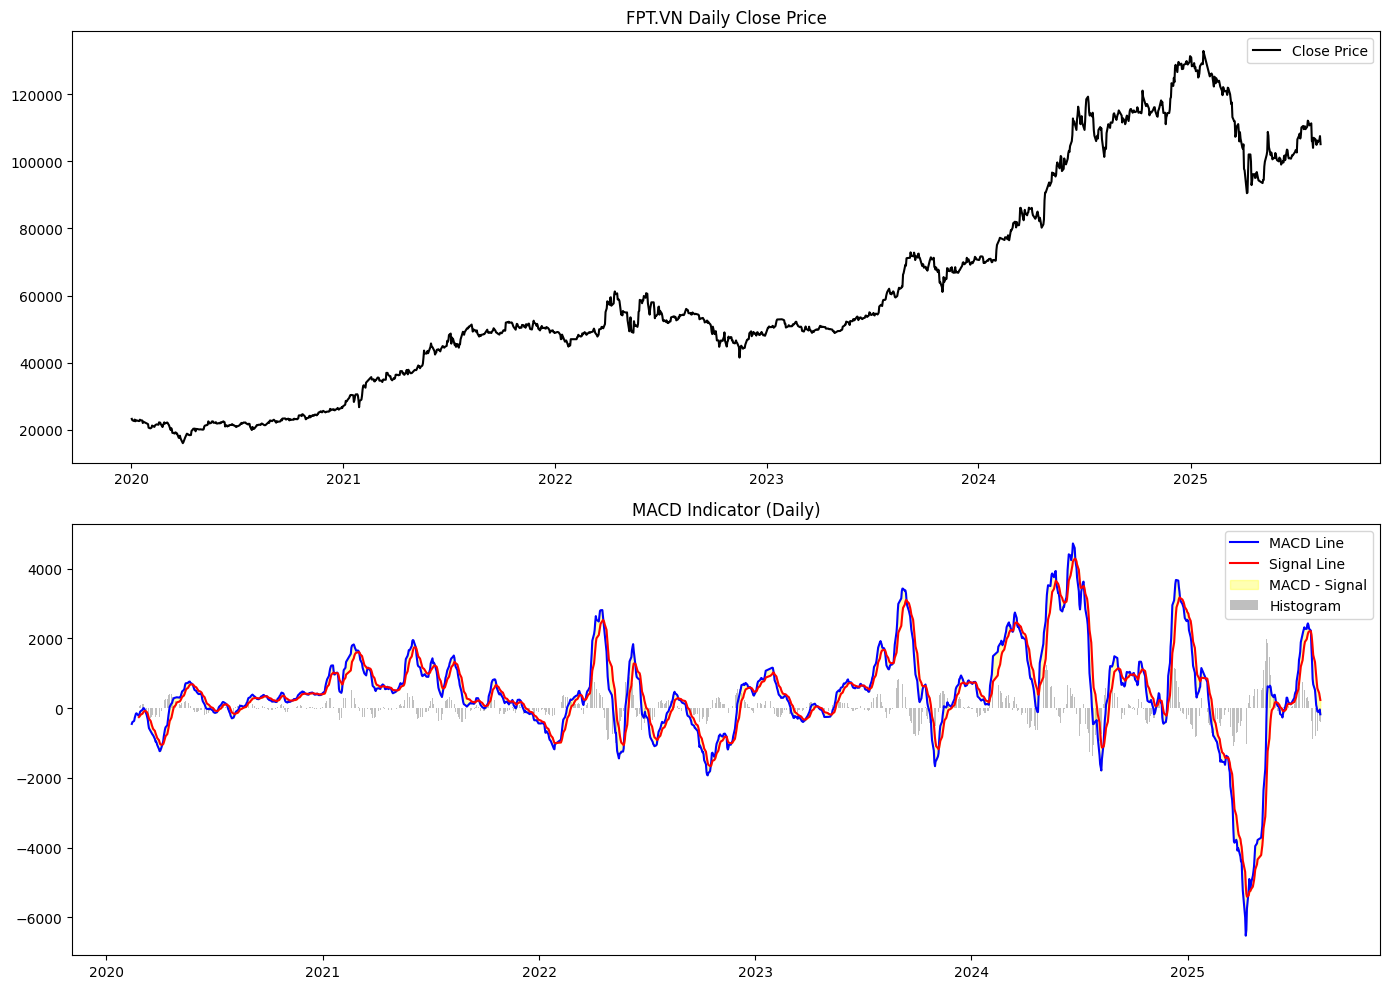

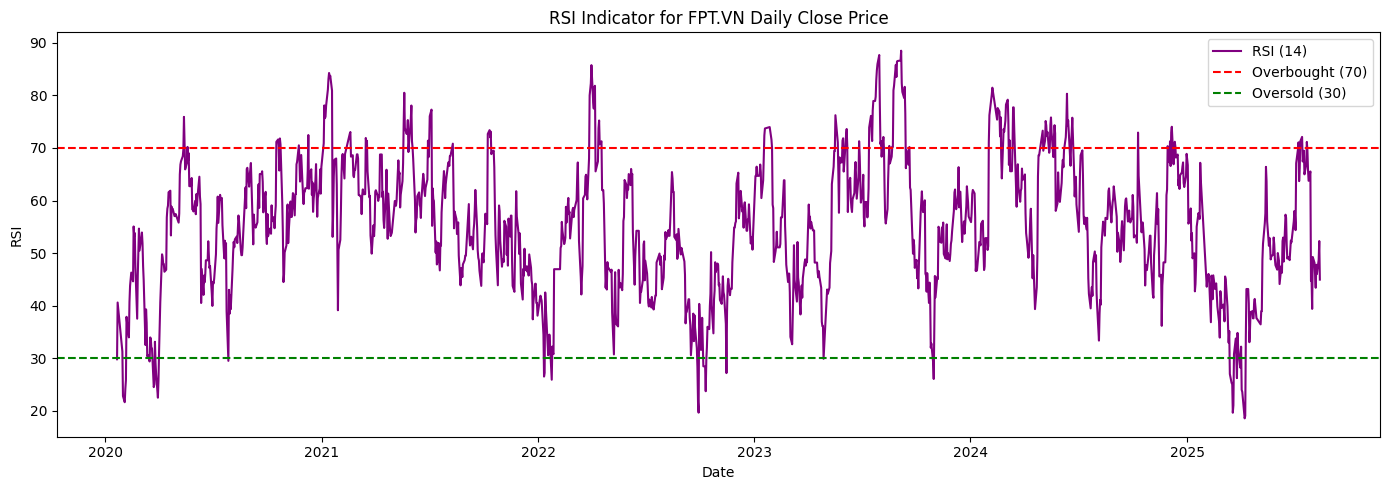

/var/folders/z7/r_tqdn6d1hg1j1gn1qbc2qn40000gn/T/ipykernel_988/3552223590.py:95: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  open_price = float(row['Open'])
/var/folders/z7/r_tqdn6d1hg1j1gn1qbc2qn40000gn/T/ipykernel_988/3552223590.py:96: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  high_price = float(row['High'])
/var/folders/z7/r_tqdn6d1hg1j1gn1qbc2qn40000gn/T/ipykernel_988/3552223590.py:97: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  low_price = float(row['Low'])
/var/folders/z7/r_tqdn6d1hg1j1gn1qbc2qn40000gn/T/ipykernel_988/3552223590.py:98: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cl

,Ngày mua,Ngày bán,Giá mua vào,Giá bán ra,Lãi,Loại mô hình mua,Loại mô hình bán
0,2020-12-31,2021-01-22,26536.405918,30555.689453,4019.283535,Nến bao trùm,Chốt lời 15%
1,2021-01-25,2021-02-17,30510.019016,35579.796875,5069.777859,Nến búa,Chốt lời 15%
2,2021-05-07,2021-05-20,37772.132087,43618.359375,5846.227288,Nến búa,Chốt lời 15%
3,2021-09-15,2021-09-22,49268.199383,48953.046875,-315.152508,Nến búa,Đảo chiều giảm
4,2021-10-05,2022-04-01,49898.495767,58302.445312,8403.949546,Nến búa,Chốt lời 15%
5,2022-03-21,2022-04-01,50003.541725,58302.445312,8298.903588,Nến búa,Chốt lời 15%
6,2022-07-20,2022-08-25,53575.227343,54394.613281,819.385938,Nến bao trùm,Đảo chiều giảm
7,2023-03-28,2023-04-18,49919.503906,50045.558594,126.054688,Nến búa,Đảo chiều giảm
8,2023-12-26,2024-03-04,71033.205591,82001.039062,10967.833471,Nến búa,Chốt lời 15%
9,2024-04-25,2024-06-07,90171.689932,104525.546875,14353.856943,Nến búa,Chốt lời 15%


/opt/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1719: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


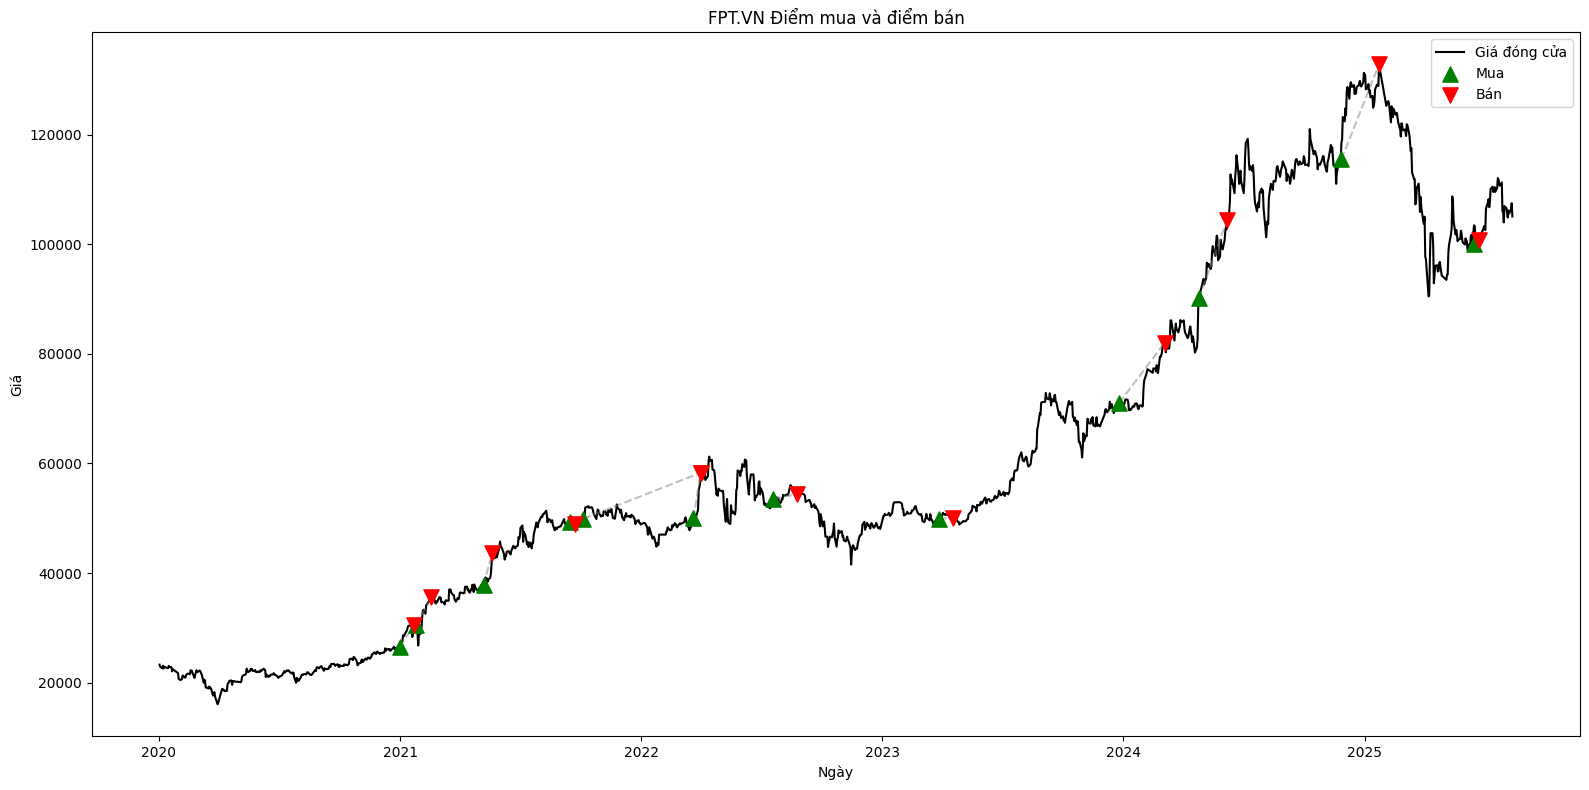

In [10]:
analyze_stock('FPT.VN', '2020-01-01')

Processing 100 unique stocks...
Looking for crosses since: 2025-08-07


/var/folders/z7/r_tqdn6d1hg1j1gn1qbc2qn40000gn/T/ipykernel_988/3264896377.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start=start_date, progress=False)
/var/folders/z7/r_tqdn6d1hg1j1gn1qbc2qn40000gn/T/ipykernel_988/3264896377.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start=start_date, progress=False)
/var/folders/z7/r_tqdn6d1hg1j1gn1qbc2qn40000gn/T/ipykernel_988/3264896377.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start=start_date, progress=False)
/var/folders/z7/r_tqdn6d1hg1j1gn1qbc2qn40000gn/T/ipykernel_988/3264896377.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start=start_date, progress=False)
/var/folders/z7/r_tqdn6d1hg1j1gn1qbc2qn40000gn/T/ipykernel_988/3264896377.py:24: FutureWarning: YF.download() has changed ar


✅ Results saved to latest_macd_crosses.csv
✅ Found 38 recent crosses - table plot saved


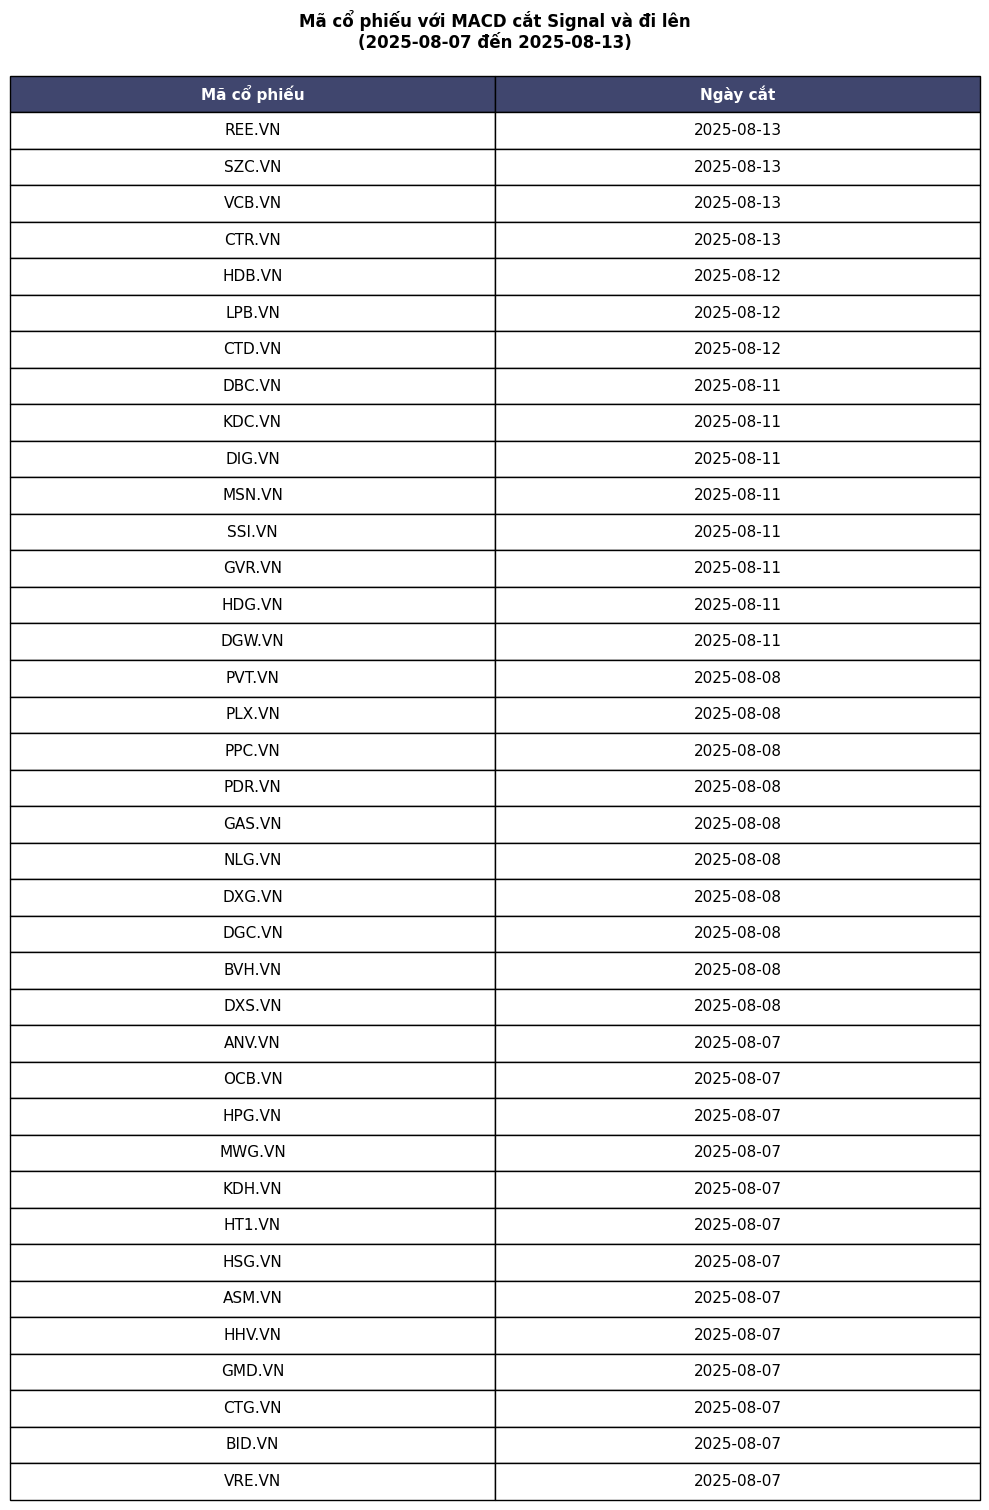

,Stock,Date,Date_DT
0,AAA.VN,2025-07-08,2025-07-08
1,ACB.VN,2025-08-06,2025-08-06
2,AGG.VN,2025-07-14,2025-07-14
3,ANV.VN,2025-08-07,2025-08-07
4,ASM.VN,2025-08-07,2025-08-07
...,...,...,...
95,VNM.VN,2025-06-16,2025-06-16
96,VPB.VN,2025-07-07,2025-07-07
97,VPI.VN,2025-07-23,2025-07-23
98,VRE.VN,2025-08-07,2025-08-07


In [7]:
import yfinance as yf
import pandas as pd
import ta
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from pandas.tseries.offsets import BDay  # For business day calculations

def find_latest_macd_cross(stocks, output_csv='latest_macd_crosses.csv', plot_table=True):
    """
    Find MACD bullish crosses and create table for stocks with crosses in last 4 trading days
    """
    start_date = (datetime.today() - timedelta(days=120)).strftime('%Y-%m-%d')
    results = []
    
    print(f"Processing {len(stocks)} unique stocks...")

    # Calculate date threshold (4 trading days ago)
    threshold_date = (datetime.today() - BDay(4)).date()
    print(f"Looking for crosses since: {threshold_date.strftime('%Y-%m-%d')}")
    
    for stock in stocks:
        try:
            # Download data
            df = yf.download(stock, start=start_date, progress=False)
            if df.empty or len(df) < 35:
                results.append({'Stock': stock, 'Date': 'Insufficient data'})
                continue

            # Calculate MACD
            macd_indicator = ta.trend.MACD(close=df['Close'].squeeze())
            df['MACD'] = macd_indicator.macd()
            df['MACD_Signal'] = macd_indicator.macd_signal()
            
            # Find bullish crossovers
            df['Bullish_Cross'] = (df['MACD'] > df['MACD_Signal']) & (df['MACD'].shift(1) <= df['MACD_Signal'].shift(1))
            
            cross_dates = df.index[df['Bullish_Cross']]
            if len(cross_dates) == 0:
                results.append({'Stock': stock, 'Date': 'No cross'})
                continue

            # Get latest cross
            latest_date = cross_dates[-1]
            results.append({
                'Stock': stock,
                'Date': latest_date.strftime('%Y-%m-%d'),
                'Date_DT': latest_date.date()  # Store as date object for comparison
            })
        except Exception as e:
            results.append({
                'Stock': stock,
                'Date': f'Error: {str(e)[:40]}',
                'Date_DT': None
            })

    # Create DataFrame
    df_out = pd.DataFrame(results)

# Clean columns with MACD, signal, and histogram values
    for col in df_out.columns:
        if df_out[col].dtype == 'object':  # Check if column contains strings
            non_null = df_out[col].dropna()
            if not non_null.empty:
                first_val = non_null.iloc[0]
            # Identify columns with the problematic pattern
                if isinstance(first_val, str) and first_val.startswith("Ticker"):
                # Extract numeric value (second token in the string)
                    df_out[col] = df_out[col].str.split().str[1].astype(float)

# Filter for recent crosses (last 4 trading days)
    recent_crosses = df_out[df_out['Date_DT'].notna() & 
                        (df_out['Date_DT'] >= threshold_date)]

# Save cleaned results to CSV (without Date_DT column)
    df_out.drop('Date_DT', axis=1).to_csv(output_csv, index=False)
    print(f"\n✅ Results saved to {output_csv}")

    # Create table plot for recent crosses
    if plot_table and not recent_crosses.empty:
        # Sort by date descending
        recent_crosses = recent_crosses.sort_values('Date_DT', ascending=False)
        
        plt.figure(figsize=(10, max(4, len(recent_crosses) * 0.4)))
        ax = plt.subplot(frame_on=False)
        ax.axis('off')
        
        # Create table
        table_data = recent_crosses[['Stock', 'Date']].values
        col_labels = ['Mã cổ phiếu', 'Ngày cắt']
        
        table = plt.table(
            cellText=table_data,
            colLabels=col_labels,
            cellLoc='center',
            loc='center'
        )
        
        # Style table
        table.auto_set_font_size(False)
        table.set_fontsize(11)
        table.scale(1, 1.8)
        
        # Highlight header
        for (i, j), cell in table.get_celld().items():
            if i == 0:  # Header row
                cell.set_text_props(weight='bold', color='white')
                cell.set_facecolor('#40466e')
        
        plt.title(f'Mã cổ phiếu với MACD cắt Signal và đi lên\n({threshold_date} đến {datetime.today().date()})', 
                 fontweight='bold', pad=20)
        plt.tight_layout()
        
        # Save and show
        plt.savefig('recent_macd_crosses.png', dpi=120, bbox_inches='tight')
        print(f"✅ Found {len(recent_crosses)} recent crosses - table plot saved")
        plt.show()
    elif plot_table:
        print("ⓘ No recent MACD crosses found in last 4 trading days")
    
    return df_out

stocks = [
    "AAA.VN", "ACB.VN", "AGG.VN", "ANV.VN", "ASM.VN", "BCG.VN", "BCM.VN", "BID.VN",
    "BMP.VN", "BVH.VN", "BWE.VN", "CII.VN", "CMG.VN", "CRE.VN", "CTD.VN", "CTG.VN",
    "CTR.VN", "DBC.VN", "DCM.VN", "DGC.VN", "DGW.VN", "DHC.VN", "DIG.VN", "DPM.VN",
    "DXG.VN", "DXS.VN", "EIB.VN", "FPT.VN", "FRT.VN", "FTS.VN", "GAS.VN", "GEG.VN",
    "GEX.VN", "GMD.VN", "GVR.VN", "HAG.VN", "HCM.VN", "HDB.VN", "HDC.VN", "HDG.VN",
    "HHV.VN", "HPG.VN", "HSG.VN", "HT1.VN", "IMP.VN", "KBC.VN", "KDC.VN", "KDH.VN",
    "KOS.VN", "LPB.VN", "MBB.VN", "MSB.VN", "MSN.VN", "MWG.VN", "NKG.VN", "NLG.VN",
    "NT2.VN", "OCB.VN", "PAN.VN", "PC1.VN", "PDR.VN", "PHR.VN", "PLX.VN", "PNJ.VN",
    "POW.VN", "PPC.VN", "PTB.VN", "PVD.VN", "PVT.VN", "REE.VN", "SAB.VN", "SAM.VN",
    "SBT.VN", "SCS.VN", "SHB.VN", "SJS.VN", "SSB.VN", "SSI.VN", "STB.VN", "SZC.VN",
    "TCB.VN", "TCH.VN", "TMS.VN", "TPB.VN", "VCB.VN", "VCG.VN", "VCI.VN", "VGC.VN",
    "VHC.VN", "VHM.VN", "VIB.VN", "VIC.VN", "VIX.VN", "VJC.VN", "VND.VN", "VNM.VN",
    "VPB.VN", "VPI.VN", "VRE.VN", "VSH.VN"
]
find_latest_macd_cross(stocks)